# Context
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?



https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

## Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## 📖 Importing Libraries

In [1]:
# manpulation
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Understand Data

* 1) understand columns
* 2) check dtypes
* 3) num describe
* 4) cat describe

In [2]:
#  1) understand columns
df = pd.read_csv("train.csv", na_values=['0', '?', 'xx'])
df

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0              NaN   70172    Male     Loyal Customer   13  Personal Travel   
1              1.0    5047    Male  disloyal Customer   25  Business travel   
2              2.0  110028  Female     Loyal Customer   26  Business travel   
3              3.0   24026  Female     Loyal Customer   25  Business travel   
4              4.0  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899    103899.0   94171  Female  disloyal Customer   23  Business travel   
103900    103900.0   73097    Male     Loyal Customer   49  Business travel   
103901    103901.0   68825    Male  disloyal Customer   30  Business travel   
103902    103902.0   54173  Female  disloyal Customer   22  Business travel   
103903    103903.0   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                    3.0   
1       Business              235                    3.0   
2       Business             1142                    2.0   
3       Business              562                    2.0   
4       Business              214                    3.0   
...          ...              ...                    ...   
103899       Eco              192                    2.0   
103900  Business             2347                    4.0   
103901  Business             1995                    1.0   
103902       Eco             1000                    1.0   
103903  Business             1723                    1.0   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                     4.0  ...                     5.0   
1                                     2.0  ...                     1.0   
2                                     2.0  ...                     5.0   
3                                     5.0  ...                     2.0   
4                                     3.0  ...                     3.0   
...                                   ...  ...                     ...   
103899                                1.0  ...                     2.0   
103900                                4.0  ...                     5.0   
103901                                1.0  ...                     4.0   
103902                                1.0  ...                     1.0   
103903                                3.0  ...                     1.0   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                    4.0               3.0                 4              4.0   
1                    1.0               5.0                 3              1.0   
2                    4.0               3.0                 4              4.0   
3                    2.0               5.0                 3              1.0   
4                    3.0               4.0                 4              3.0   
...                  ...               ...               ...              ...   
103899               3.0               1.0                 4              2.0   
103900               5.0               5.0                 5              5.0   
103901               3.0               2.0                 4              5.0   
103902               4.0               5.0                 1              5.0   
103903               1.0               1.0                 4              4.0   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                    5.0          5.0                        25.0   
1                    4.0          1.0                         1.0   
2                    4.0          5.0                         NaN   
3                    4.0          2.0                        11.0   
4                    3.0          3.0                         NaN   
...                  ...          ...                         

In [3]:
# a) Understand Columns
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
# b) check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103903 non-null  float64
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              100801 non-null  float64
 9   Departure/Arrival time convenient  98604 non-null   float64
 10  Ease of Online booking             99417 non-null   float64
 11  Gate location                      1039

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df

id  Gender      Customer Type  Age   Type of Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
103899   94171  Female  disloyal Customer   23  Business travel       Eco   
103900   73097    Male     Loyal Customer   49  Business travel  Business   
103901   68825    Male  disloyal Customer   30  Business travel  Business   
103902   54173  Female  disloyal Customer   22  Business travel       Eco   
103903   62567    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                    3.0   
1                   235                    3.0   
2                  1142                    2.0   
3                   562                    2.0   
4                   214                    3.0   
...                 ...                    ...   
103899              192                    2.0   
103900             2347                    4.0   
103901             1995                    1.0   
103902             1000                    1.0   
103903             1723                    1.0   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                     4.0                     3.0  ...   
1                                     2.0                     3.0  ...   
2                                     2.0                     2.0  ...   
3                                     5.0                     5.0  ...   
4                                     3.0                     3.0  ...   
...                                   ...                     ...  ...   
103899                                1.0                     2.0  ...   
103900                                4.0                     4.0  ...   
103901                                1.0                     1.0  ...   
103902                                1.0                     1.0  ...   
103903                                3.0                     3.0  ...   

        Inflight entertainment  On-board service  Leg room service  \
0                          5.0               4.0               3.0   
1                          1.0               1.0               5.0   
2                          5.0               4.0               3.0   
3                          2.0               2.0               5.0   
4                          3.0               3.0               4.0   
...                        ...               ...               ...   
103899                     2.0               3.0               1.0   
103900                     5.0               5.0               5.0   
103901                     4.0               3.0               2.0   
103902                     1.0               4.0               5.0   
103903                     1.0               1.0               1.0   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4              4.0               5.0          5.0   
1                      3              1.0               4.0          1.0   
2                      4              4.0               4.0          5.0   
3                      3              1.0               4.0          2.0   
4                      4              3.0               3.0          3.0   
...                  ...              ...               ...          ...   
103899                 4              2.0               3.0          2.0   
103900                 5              5.0               5.0          4.0   
103901                 4              5.0               5.0          4.0

In [6]:
df.drop(['id'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                    3.0   
1                   235                    3.0   
2                  1142                    2.0   
3                   562                    2.0   
4                   214                    3.0   
...                 ...                    ...   
103899              192                    2.0   
103900             2347                    4.0   
103901             1995                    1.0   
103902             1000                    1.0   
103903             1723                    1.0   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                     4.0                     3.0   
1                                     2.0                     3.0   
2                                     2.0                     2.0   
3                                     5.0                     5.0   
4                                     3.0                     3.0   
...                                   ...                     ...   
103899                                1.0                     2.0   
103900                                4.0                     4.0   
103901                                1.0                     1.0   
103902                                1.0                     1.0   
103903                                3.0                     3.0   

        Gate location  ...  Inflight entertainment  On-board service  \
0                 1.0  ...                     5.0               4.0   
1                 3.0  ...                     1.0               1.0   
2                 2.0  ...                     5.0               4.0   
3                 5.0  ...                     2.0               2.0   
4                 3.0  ...                     3.0               3.0   
...               ...  ...                     ...               ...   
103899            3.0  ...                     2.0               3.0   
103900            4.0  ...                     5.0               5.0   
103901            3.0  ...                     4.0               3.0   
103902            5.0  ...                     1.0               4.0   
103903            3.0  ...                     1.0               1.0   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                    3.0                 4              4.0               5.0   
1                    5.0                 3              1.0               4.0   
2                    3.0                 4              4.0               4.0   
3                    5.0                 3              1.0               4.0   
4                    4.0                 4              3.0               3.0   
...                  ...               ...              ...               ...   
103899               1.0                 4              2.0               3.0   
103900               5.0                 5              5.0               5.0   
103901               2.0                 4              5.0               5.0   
103902               5.0                 1              5.0               

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# c) Describe Numerical Cols
df.describe()


Age  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          100801.000000   
mean       39.379706      1189.448375               2.813712   
std        15.114964       997.147281               1.257367   
min         7.000000        31.000000               1.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       98604.000000            99417.000000   
mean                            3.224788                2.881328   
std                             1.385790                1.298773   
min                             1.000000                1.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103903.000000   103797.000000    101476.000000  103903.000000   
mean        2.976911        3.205430         3.328147       3.439429   
std         1.277594        1.326235         1.267246       1.319051   
min         1.000000        1.000000         1.000000       1.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         4.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            103890.00000     103901.000000     103432.000000   
mean                  3.35861          3.382460          3.366347   
std                   1.33251          1.288245          1.298936   
min                   1.00000          1.000000          1.000000   
25%                   2.00000          2.000000          2.000000   
50%                   4.00000          4.000000          4.000000   
75%                   4.00000          4.000000          4.000000   
max                   5.00000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103903.000000     103901.000000  103892.000000   
mean           3.631833         3.304322          3.640533       3.286730   
std            1.180903         1.265360          1.175517       1.311873   
min            1.000000         1.000000          1.000000       1.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                45236.000000              45435.000000  
mean                    34.030462                 34.608121  
std                     51.993622                 52.365867  
min                      1.000000                  1.000000  
25%                      6.000000                  6.000000  
50%                     16.000000                 17.000000  
75%                     40.000000                 40.000000  
max                   1592.000000               1584.000000

## Interpreting the Correlation Matrix
Strong Correlation: Look for values close to 1 or -1. For example, if Flight Distance and Arrival Delay in Minutes have a correlation of 0.85, it indicates a strong positive correlation.
Weak Correlation: Values close to 0 indicate weak or no correlation. For instance, if Inflight wifi service has a correlation of 0.1 with Age, it suggests that age does not significantly affect the wifi service rating.

## Key Findings
Flight Distance and Departure Delay: Strong positive correlation (0.60) suggests that longer flights tend to have longer departure delays.
Departure Delay and Arrival Delay: Very strong positive correlation (0.90) indicates that if a flight is delayed in departure, it is likely to be delayed upon arrival as well.
Inflight wifi service shows weak correlations with other features, indicating that it may not be significantly influenced by age or flight distance.

## Delays: 
Departure delays have a mean of about 14.82 minutes, while arrival delays have a mean of about 15.18 minutes, showing that delays are common but generally not excessive.

In [9]:
# d) Describe Categorical Cols
cat_cols = df.select_dtypes(include="O").columns
for col in cat_cols:
    print(f"number of uniques of \'{col}\': {df[col].nunique()}")
    print(f"uniques of \'{col}\':\n{df[col].unique()}")
    print("*" * 50)
    print()
    print("*" * 50)

number of uniques of 'Gender': 2
uniques of 'Gender':
['Male' 'Female']
**************************************************

**************************************************
number of uniques of 'Customer Type': 2
uniques of 'Customer Type':
['Loyal Customer' 'disloyal Customer']
**************************************************

**************************************************
number of uniques of 'Type of Travel': 2
uniques of 'Type of Travel':
['Personal Travel' 'Business travel']
**************************************************

**************************************************
number of uniques of 'Class': 3
uniques of 'Class':
['Eco Plus' 'Business' 'Eco']
**************************************************

**************************************************
number of uniques of 'satisfaction': 2
uniques of 'satisfaction':
['neutral or dissatisfied' 'satisfied']
**************************************************

**************************************************


In [10]:
df.isnull().sum()

Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 3103
Departure/Arrival time convenient     5300
Ease of Online booking                4487
Gate location                            1
Food and drink                         107
Online boarding                       2428
Seat comfort                             1
Inflight entertainment                  14
On-board service                         3
Leg room service                       472
Baggage handling                         0
Checkin service                          1
Inflight service                         3
Cleanliness                             12
Departure Delay in Minutes           58668
Arrival Delay in Minutes             58469
satisfaction                             0
dtype: int6

In [11]:
cat_cols = df.select_dtypes(include="O").columns
for col in cat_cols:
    print(f"number of uniques of \'{col}\': {df[col].value_counts()}")
    print(f"uniques of \'{col}\':\n{df[col].unique()}")
    print("*" * 50)
    print()
    print("*" * 50)

number of uniques of 'Gender': Gender
Female    52727
Male      51177
Name: count, dtype: int64
uniques of 'Gender':
['Male' 'Female']
**************************************************

**************************************************
number of uniques of 'Customer Type': Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
uniques of 'Customer Type':
['Loyal Customer' 'disloyal Customer']
**************************************************

**************************************************
number of uniques of 'Type of Travel': Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
uniques of 'Type of Travel':
['Personal Travel' 'Business travel']
**************************************************

**************************************************
number of uniques of 'Class': Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
uniques of 'Class':
['Eco Plus' 'Business' '

In [12]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [13]:
df['Gate location']

0         1.0
1         3.0
2         2.0
3         5.0
4         3.0
         ... 
103899    3.0
103900    4.0
103901    3.0
103902    5.0
103903    3.0
Name: Gate location, Length: 103904, dtype: float64

In [14]:
df["Inflight wifi service"]

0         3.0
1         3.0
2         2.0
3         2.0
4         3.0
         ... 
103899    2.0
103900    4.0
103901    1.0
103902    1.0
103903    1.0
Name: Inflight wifi service, Length: 103904, dtype: float64

***

### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box 
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot

## EXTRACT FEATURES

Ordinal Ratings: All the service and convenience ratings

In [15]:
#features = df[["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment","On-board service"Leg room service","Baggage handling","Checkin service","Inflight service","Cleanliness","satisfaction"]

In [16]:
# Rename the column "Gate location" to "Security Checks"
##features.rename(columns={"Gate location": "Security Checks"}, inplace=True)

# Display the updated columns to verify the renaming
#features.columns


In [17]:
# Check if the column 'Security Checks' exists and is numeric
#if "Security Checks" in df.columns and pd.api.types.is_numeric_dtype(df["Security Checks"]):
    # Replace 'Gate location' values with 'Security Checks' values
    #features["Gate location"] = df["Security Checks"]
#else:
    #"The column 'Security Checks' is missing or not numeric."

# Display the first few rows of the modified features to confirm changes
#features.head()

* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

Age


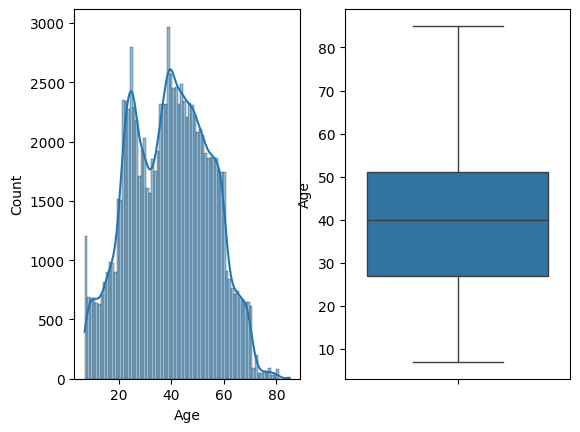

Flight Distance


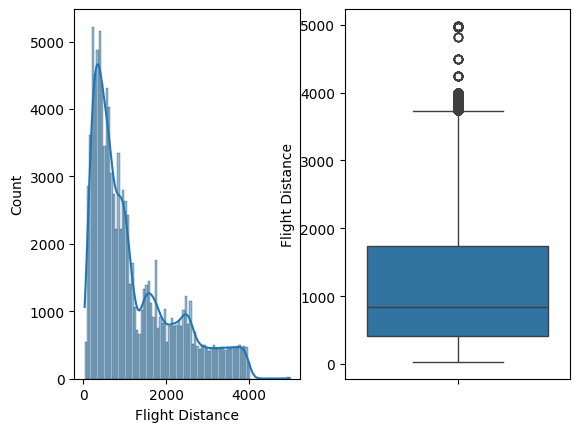

Inflight wifi service


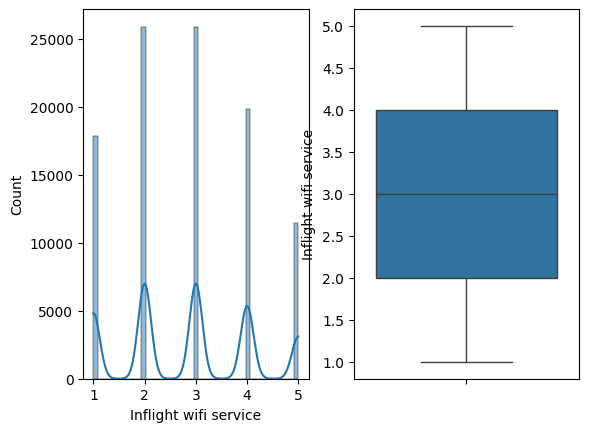

Departure/Arrival time convenient


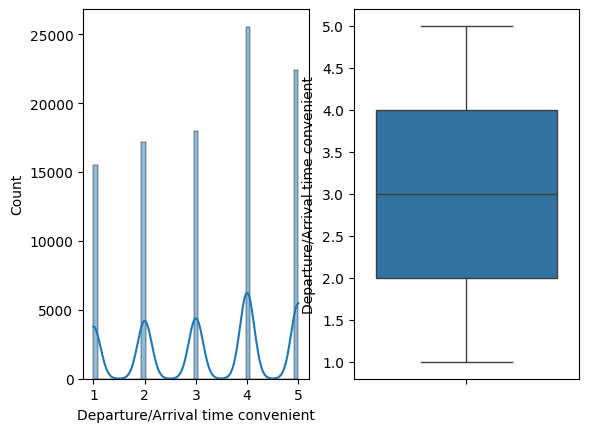

Ease of Online booking


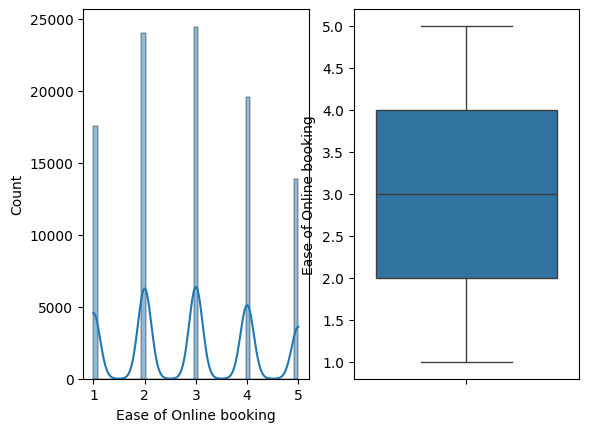

Gate location


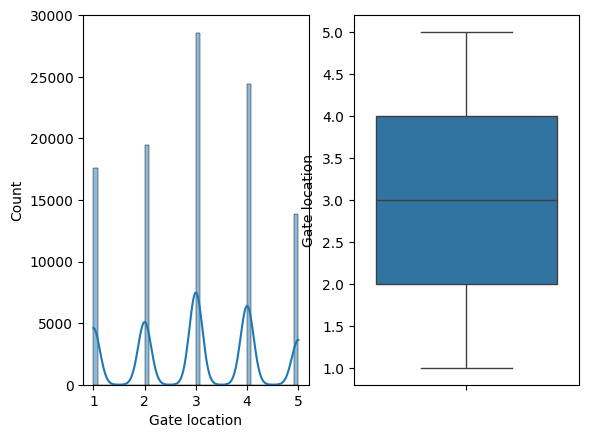

Food and drink


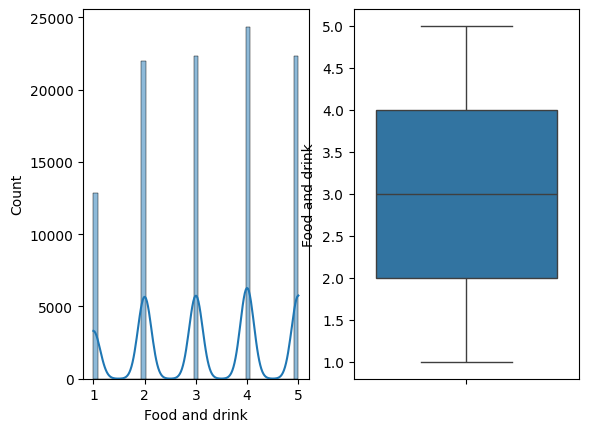

Online boarding


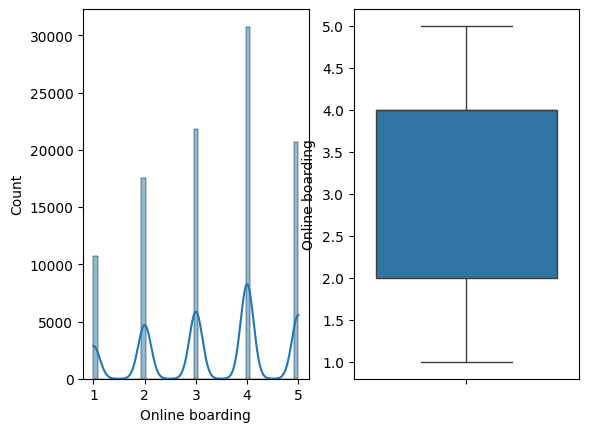

Seat comfort


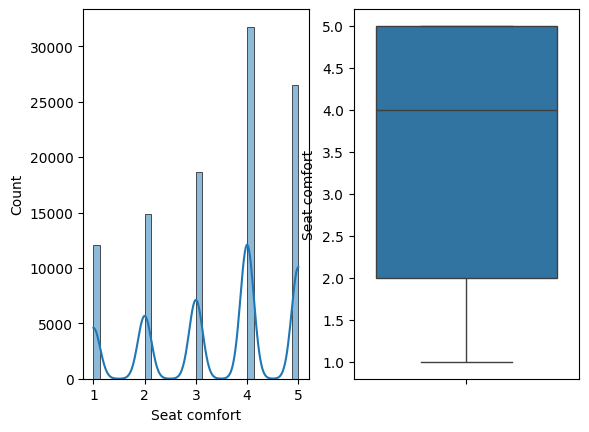

Inflight entertainment


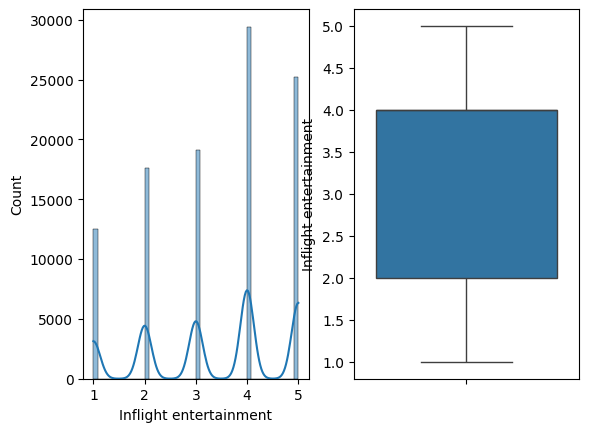

On-board service


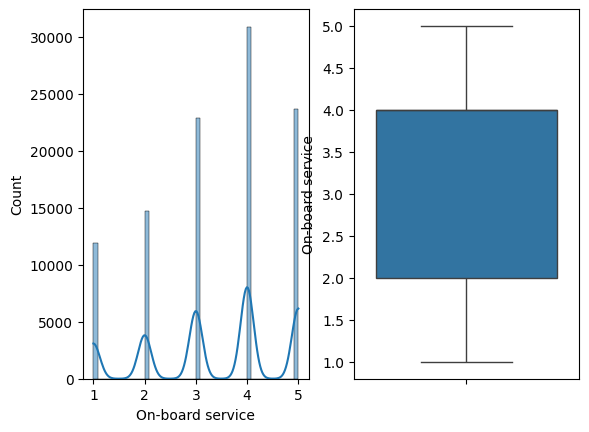

Leg room service


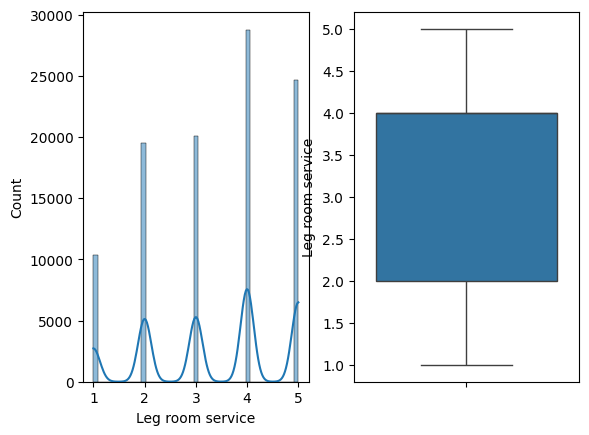

Baggage handling


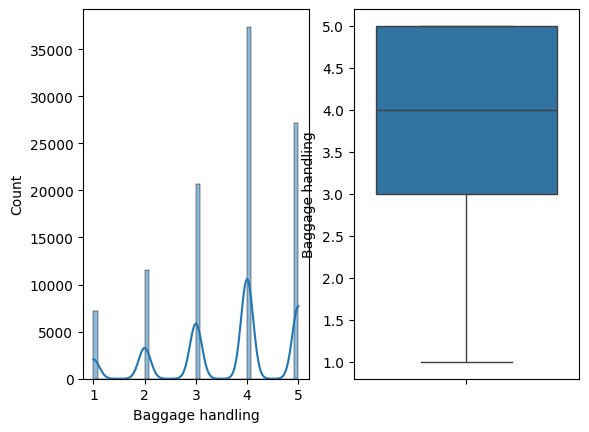

Checkin service


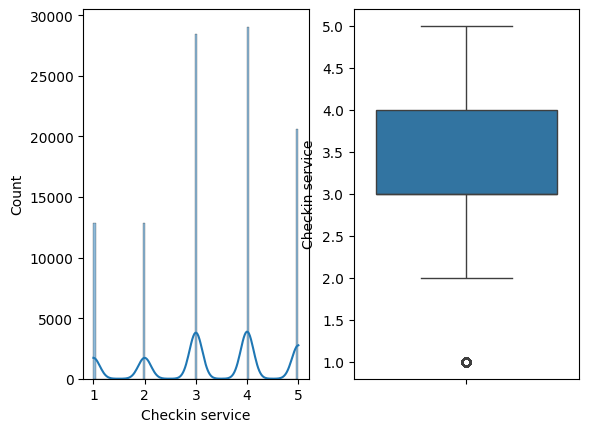

Inflight service


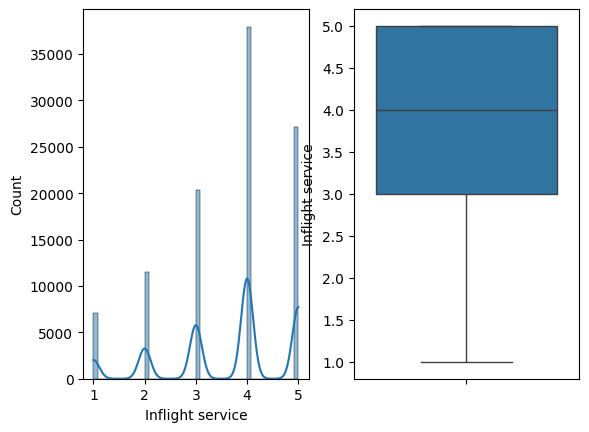

Cleanliness


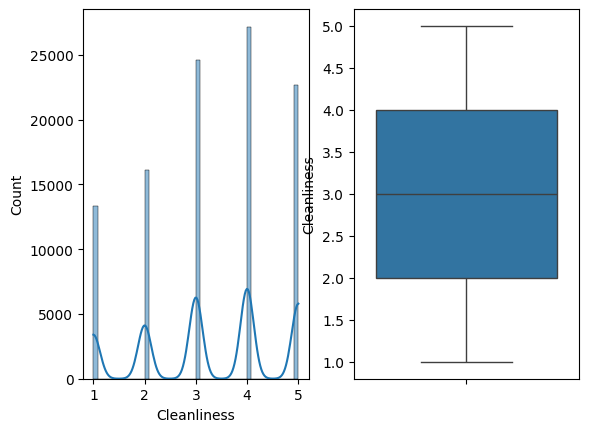

Departure Delay in Minutes


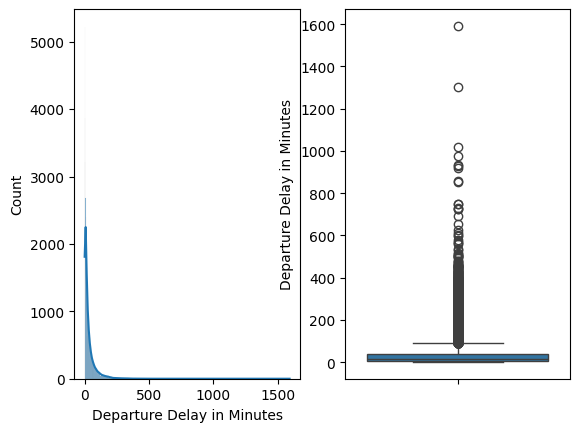

Arrival Delay in Minutes


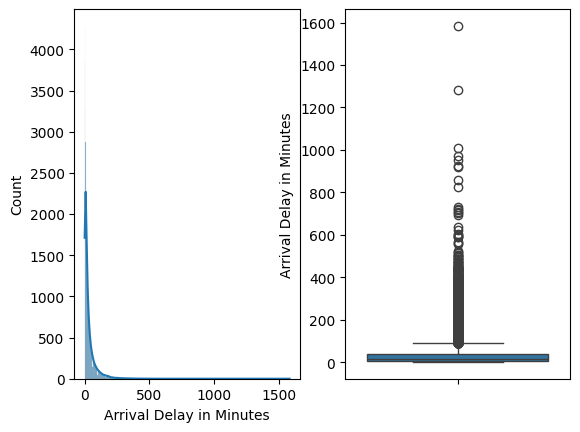

In [18]:
## Uni-variate Analysis
### univariate
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    print(col)
    fig, axes = plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(df[col], ax=axes[1])
    plt.show()

In [19]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Gender


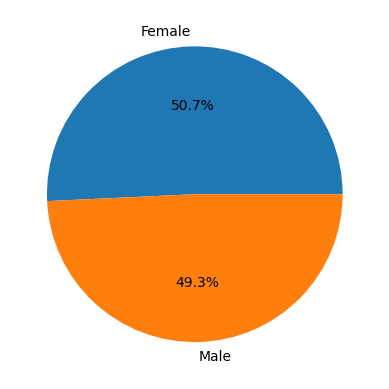

Customer Type


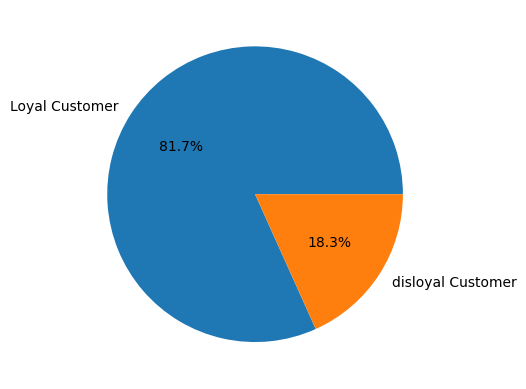

Type of Travel


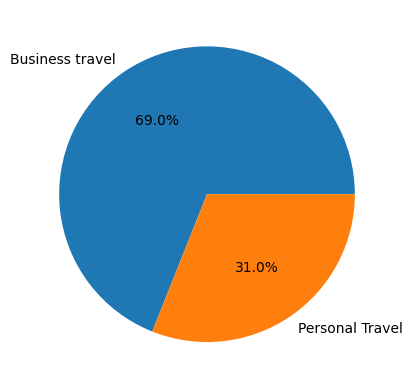

Class


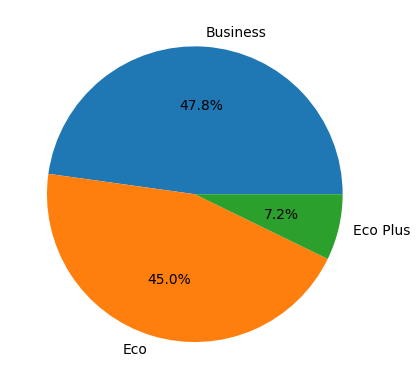

satisfaction


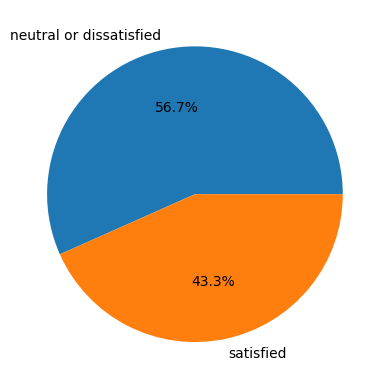

In [20]:
# Univariate Cat
cat_columns = df.select_dtypes(include="O").columns
for col in cat_columns:
    print(col)
    if df[col].nunique() < 7:
        dff = df.groupby(col)[["satisfaction"]].count()
        plt.pie(labels=dff.index, x=dff['satisfaction'], autopct="%1.1f%%")
    elif df[col].nunique() < 20:
        sns.countplot(x=df[col])
    else:
        print(f"Most of column \"{col}\" is uniques")
    plt.show()

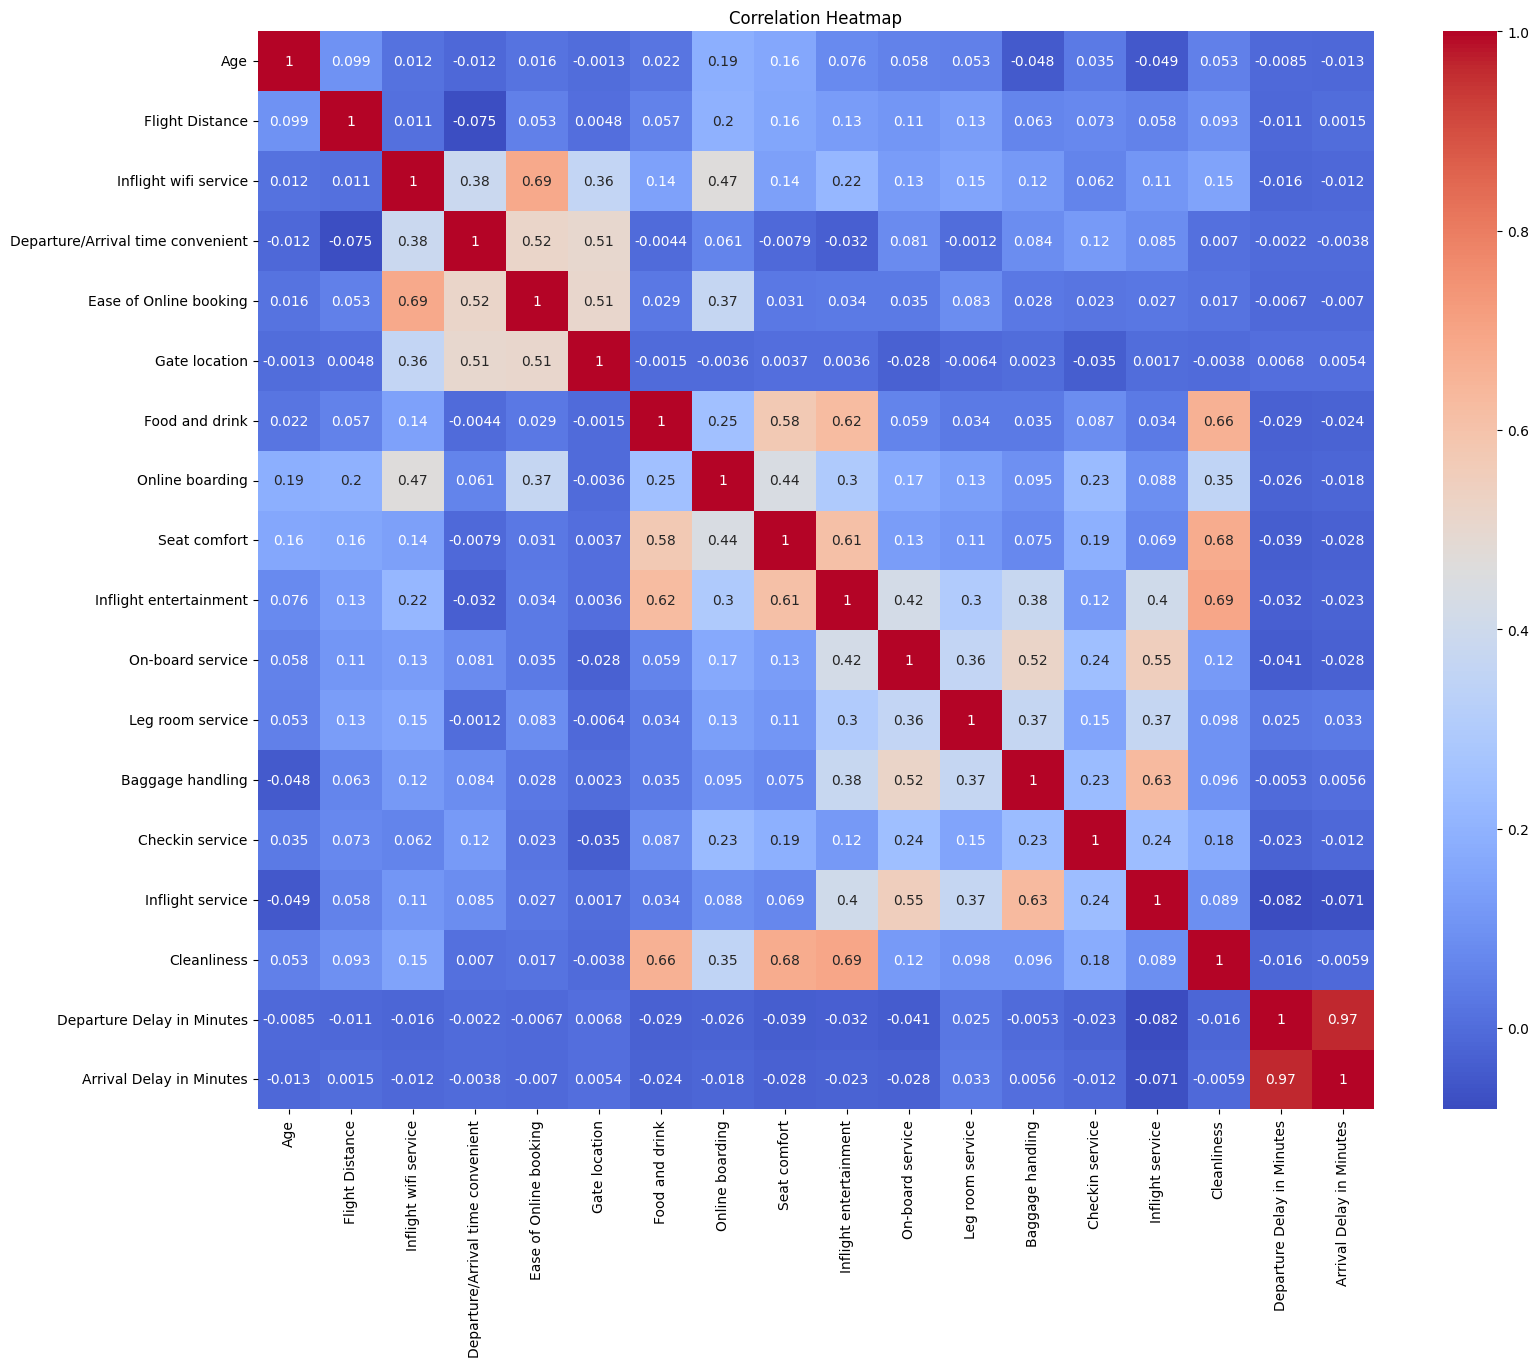

In [21]:
# Assuming df 
plt.figure(figsize=(18, 14))  # the figure size 

# the heatmap
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box 
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)


In [22]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [23]:
# 1) Which Age Have highest Food and drink Rate?
df.groupby("Age")[['Food and drink']].mean().sort_values(by='Food and drink', ascending=False).reset_index()

Age  Food and drink
0    79        3.380952
1    32        3.373563
2    31        3.357232
3    47        3.306833
4    44        3.304313
..  ...             ...
70   12        2.917591
71   78        2.909091
72   71        2.893617
73   76        2.888889
74   74        2.702128

[75 rows x 2 columns]

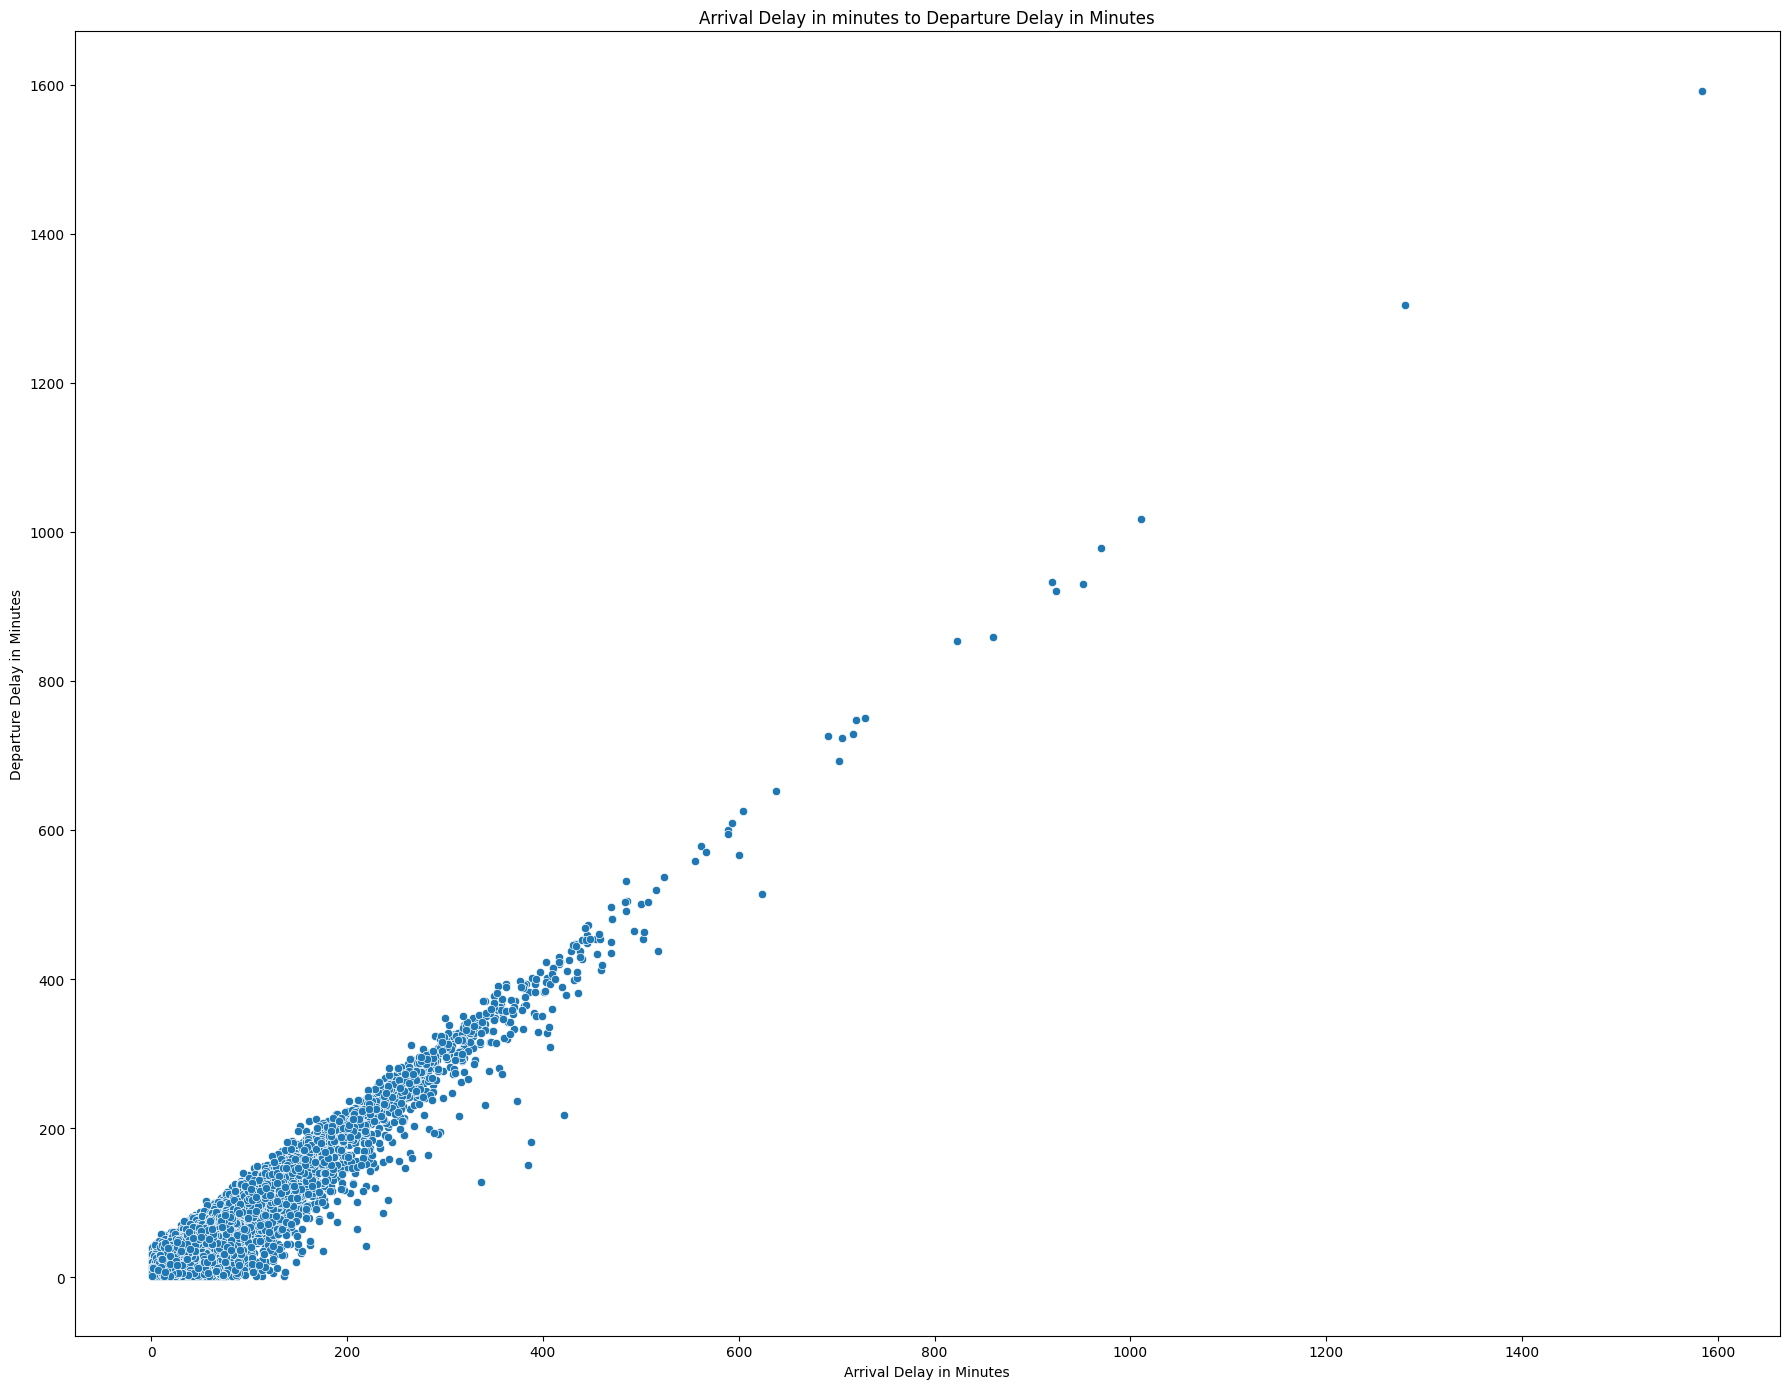

In [24]:
# * Num vs Num
    #    - Scatter (relationship btn 2 variables)
     #   - line (trend with time)
# 2) What is the relation between Arrival Delay in minutes to Departure Delay in Minutes?
plt.figure(figsize=(18, 14))
sns.scatterplot(x=df['Arrival Delay in Minutes'],y=df['Departure Delay in Minutes'])
plt.title("Arrival Delay in minutes to Departure Delay in Minutes")
plt.tight_layout()
plt.show()


## From figure we find the high correlation between departure delay and arrival delay, so i will drop departure delay column

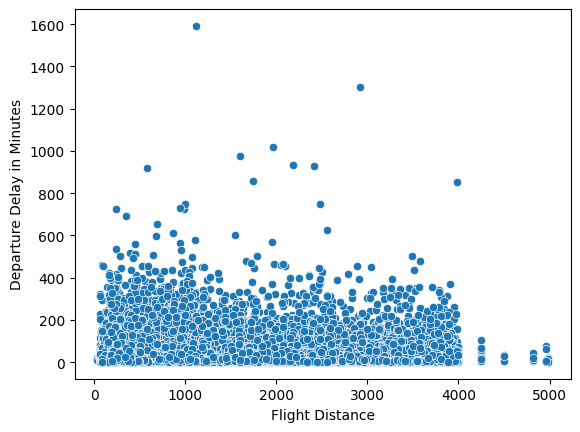

In [25]:
# Bivariate Analysis - Scatter plot
sns.scatterplot(x='Flight Distance', y='Departure Delay in Minutes', data=df)
plt.show()

## * Num vs Cat (distrbution)
        - box 
        - violin
        - strip

In [26]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Text(0.5, 1.0, 'Box Plot')

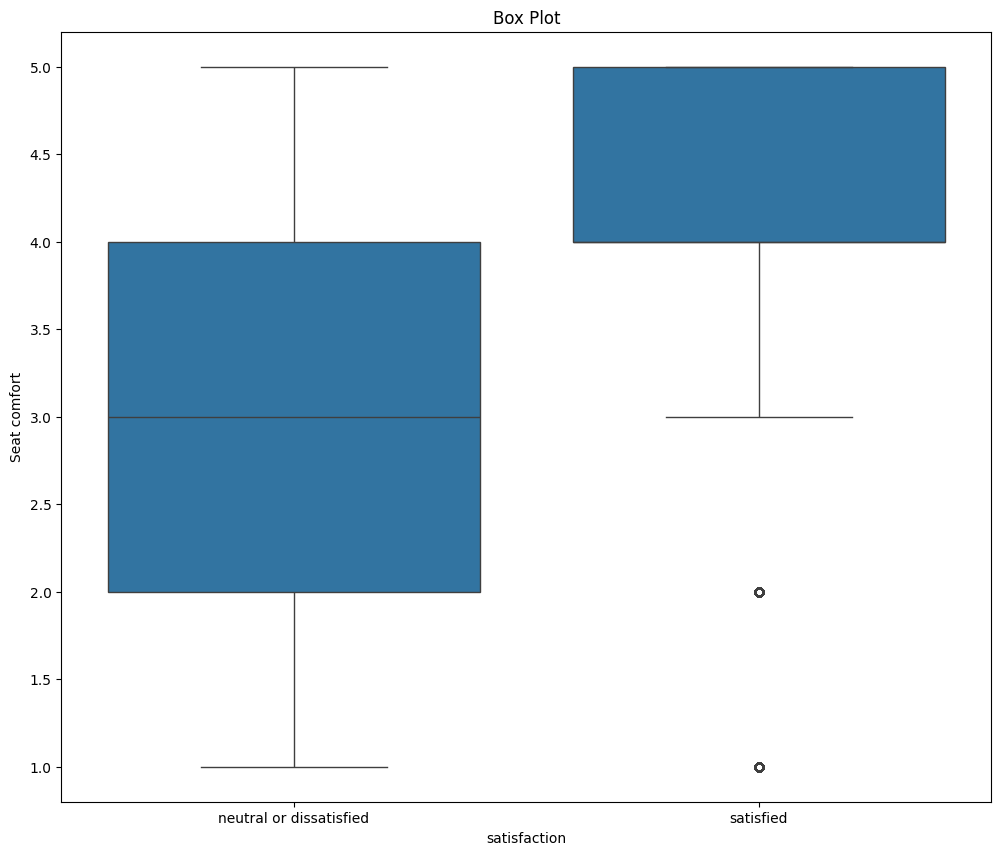

In [27]:
# Box Plot
plt.figure(figsize=(12, 10))
plt.subplot(1, 1, 1)
sns.boxplot(x='satisfaction', y='Seat comfort', data=df)
plt.title('Box Plot')


Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes', 'satisfaction'],
      dtype='object')

Text(0.5, 1.0, 'Box Plot')

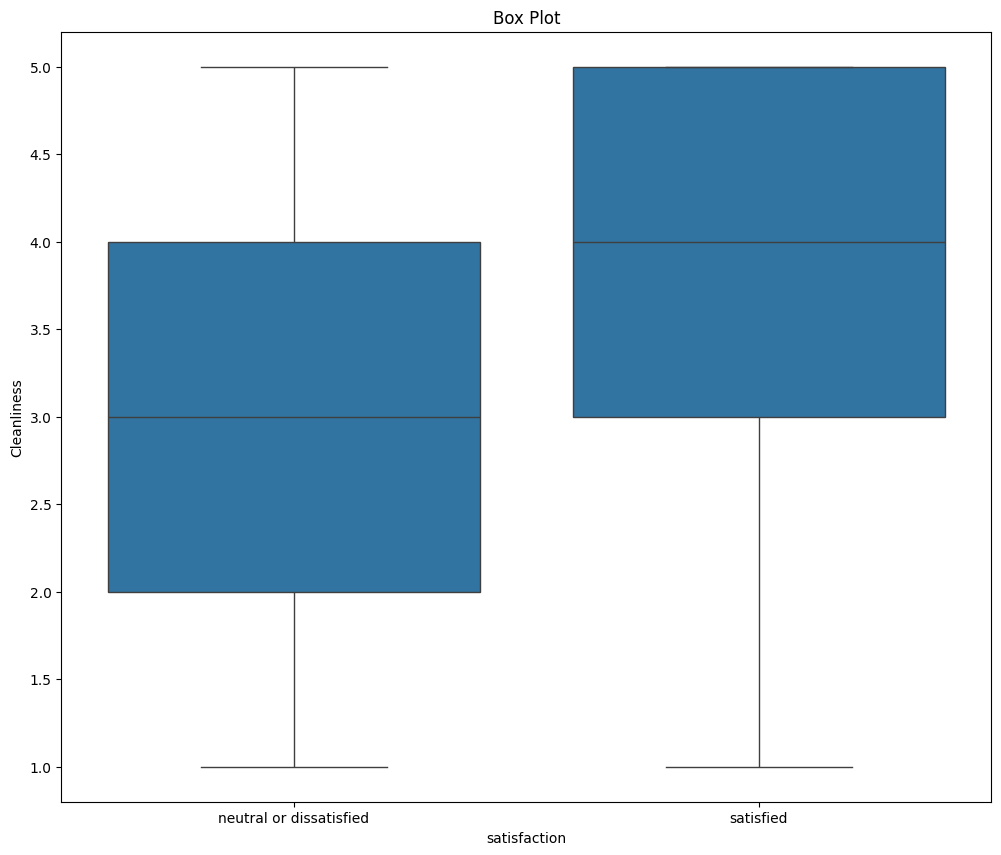

In [28]:
# Box Plot
plt.figure(figsize=(12, 10))
plt.subplot(1, 1, 1)
sns.boxplot(x='satisfaction', y='Cleanliness', data=df)
plt.title('Box Plot')


How does satisfaction relate with Flight Distance?

In [29]:
def plot_boxplot(dataframe, x_column, y_column, top_n, group_column=None, max_value=None):
    top_x = dataframe[x_column].value_counts().nlargest(top_n).index
    top_x_data = dataframe[dataframe[x_column].isin(top_x)]
    
    plt.figure(figsize=(10, 6))
    
    if group_column is None:
        boxplot_data = [top_x_data[top_x_data[x_column] == title][y_column] for title in top_x]
        labels = top_x
    else:
        grouped_data = top_x_data.groupby(group_column)
        boxplot_data = [grouped_data.get_group(title)[y_column] for title in top_x]
        labels = [str(group) for group in grouped_data.groups.keys()]
    
    plt.boxplot(boxplot_data, labels=labels)
    
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    if group_column is None:
        plt.title(f"Boxplot of {y_column} for Top {top_n} {x_column}")
    else:
        plt.title(f"Boxplot of {y_column} for Top {top_n} {x_column} Grouped by {group_column}")
    plt.xticks(rotation=45)
    
    if max_value is not None:
        plt.ylim(top=max_value)
    
    plt.show()

C:\Users\NohaA\AppData\Local\Temp\ipykernel_48224\2593789591.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels)


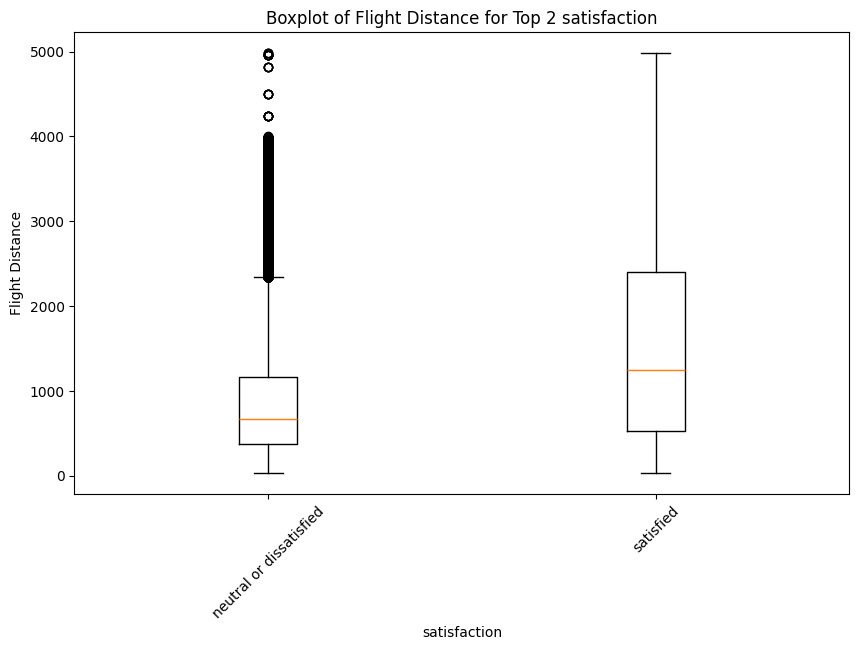

In [30]:
plot_boxplot(df, 'satisfaction', 'Flight Distance', 2)

How does the travel class relate with satisfaction?

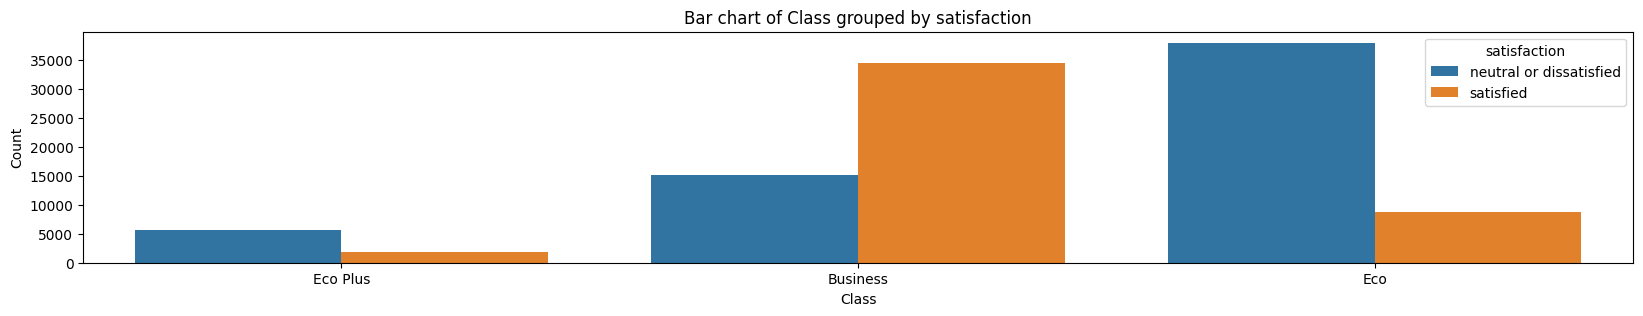

In [31]:
def plot_barchart(df, x_column, hue_column, height=3, group_column=None):
    plt.figure(figsize=(20, height))
    
    # Create a count plot with grouping (using hue parameter for grouping by satisfaction)
    sns.countplot(data=df, x=x_column, hue=hue_column)
    
    # Adding title and labels
    plt.title(f'Bar chart of {x_column} grouped by {hue_column}')
    plt.xlabel(x_column)
    plt.ylabel('Count')
    
    plt.legend(title=hue_column)
    plt.show()

# Usage
plot_barchart(df, 'Class', 'satisfaction', 3)

What is Type of Ease of Online booking distribution?

In [32]:
df['Ease of Online booking'].value_counts().to_frame()

count
Ease of Online booking       
3.0                     24449
2.0                     24021
4.0                     19571
1.0                     17525
5.0                     13851

Text(0.5, 1.0, 'Box Plot')

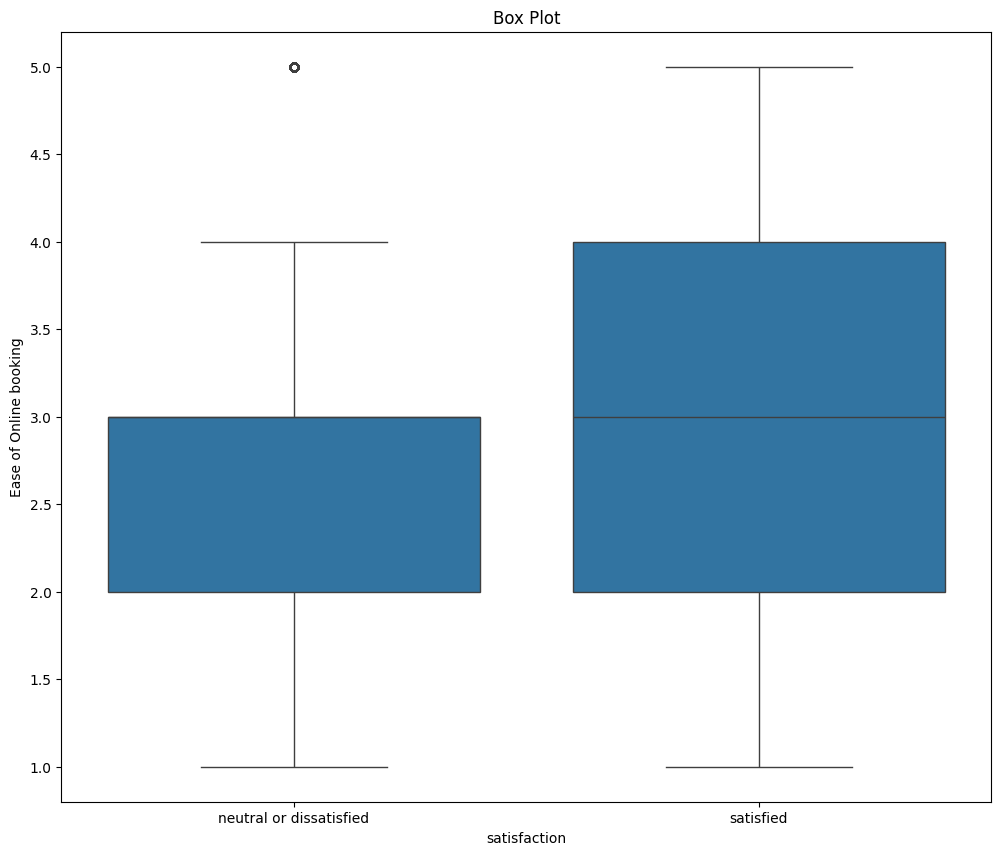

In [33]:
# Box Plot
plt.figure(figsize=(12, 10))
plt.subplot(1, 1, 1)
sns.boxplot(x='satisfaction', y='Ease of Online booking', data=df)
plt.title('Box Plot')


What is Type of Ease of Online booking distribution?

In [34]:
df['Baggage handling'].value_counts().to_frame()

count
Baggage handling       
4                 37383
5                 27131
3                 20632
2                 11521
1                  7237

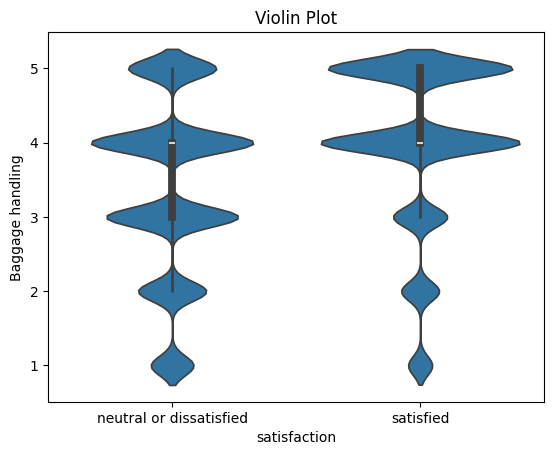

In [35]:
# Violin Plot
sns.violinplot(x='satisfaction', y='Baggage handling', data=df)
plt.title('Violin Plot')
plt.show()

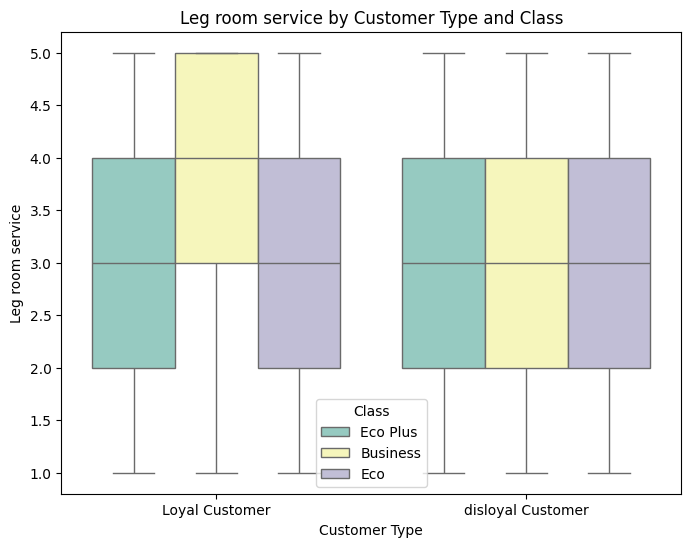

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer Type', y='Leg room service', hue='Class', data=df, palette='Set3')
plt.title('Leg room service by Customer Type and Class')
plt.xlabel('Customer Type')
plt.ylabel('Leg room service')
plt.legend(title='Class')
plt.show()

 * ## Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)


<Axes: xlabel='Class', ylabel='Count'>

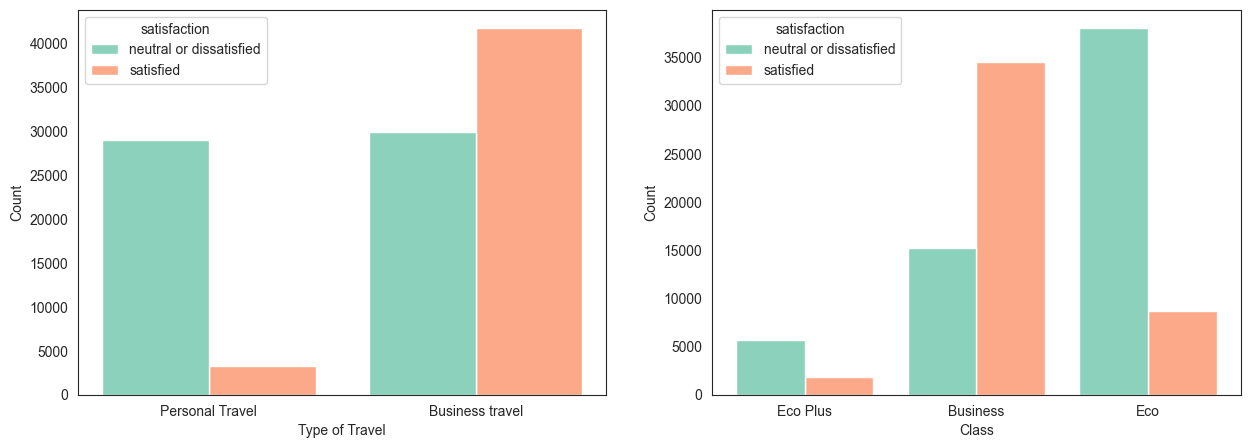

In [37]:
sns.set_style(style='white')

# Define plotting region (1 rows, 2 columns)
fig, axes = plt.subplots(1, 2,  figsize=(15, 5))
sns.histplot(data=df, x ='Type of Travel', hue='satisfaction', multiple="dodge", shrink=.8, 
             palette='Set2', ax=axes[0])
sns.histplot(data=df, x ='Class', hue ='satisfaction', multiple="dodge", shrink=.8, 
             palette='Set2', ax=axes[1])

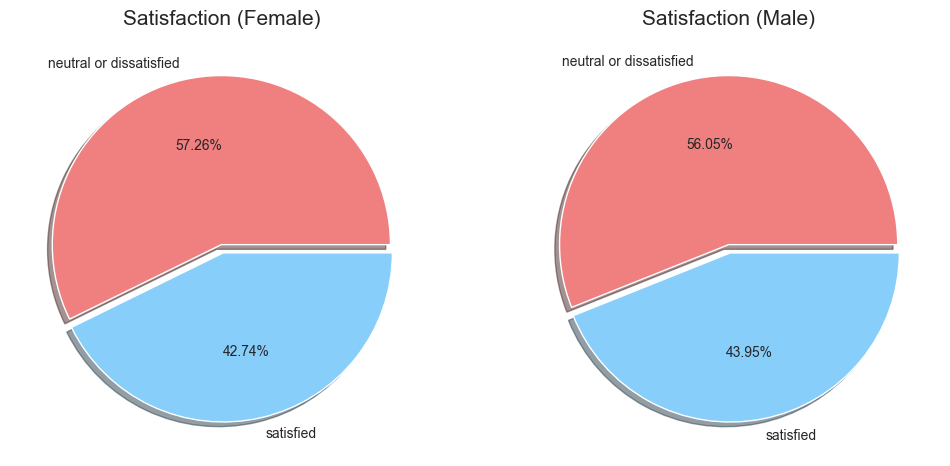

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(df.loc[df.Gender=="Female",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('Satisfaction (Female)', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(df.loc[df.Gender=="Male",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('Satisfaction (Male)', fontsize=15)

plt.show()

## * Multi-Variate Analysis
    * Pairplot

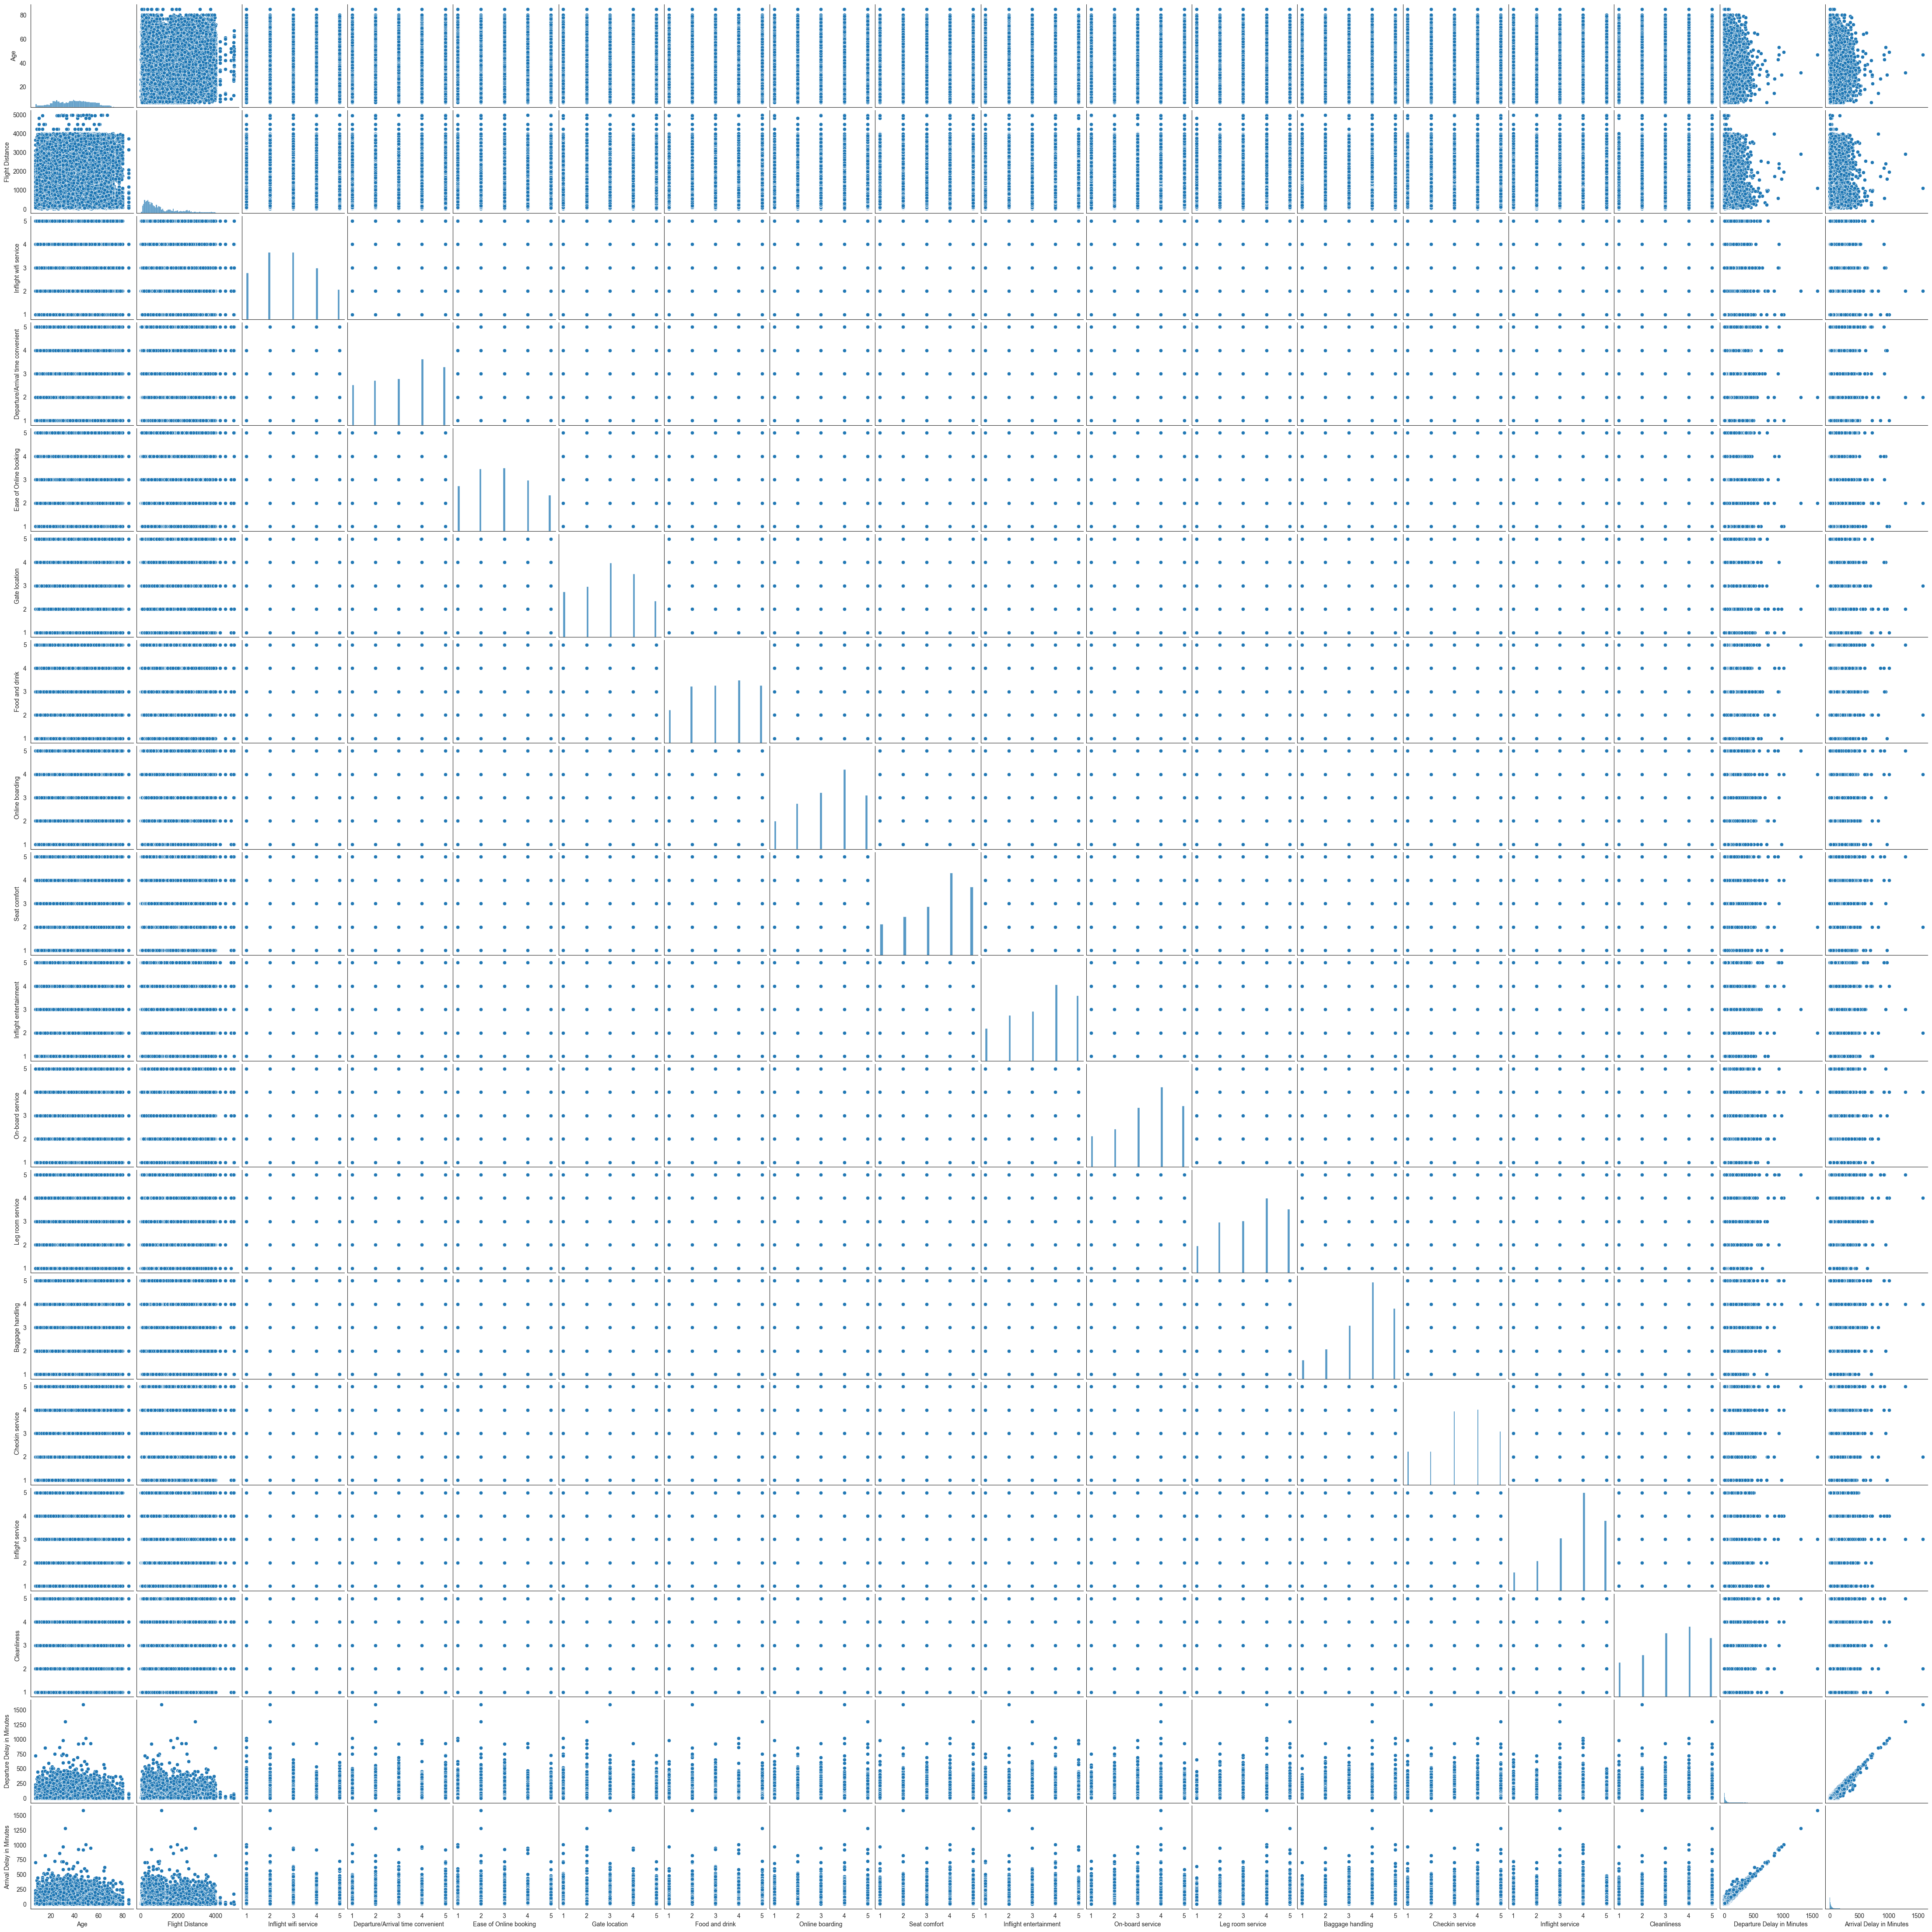

In [39]:
# Multi-variate
sns.pairplot(df)

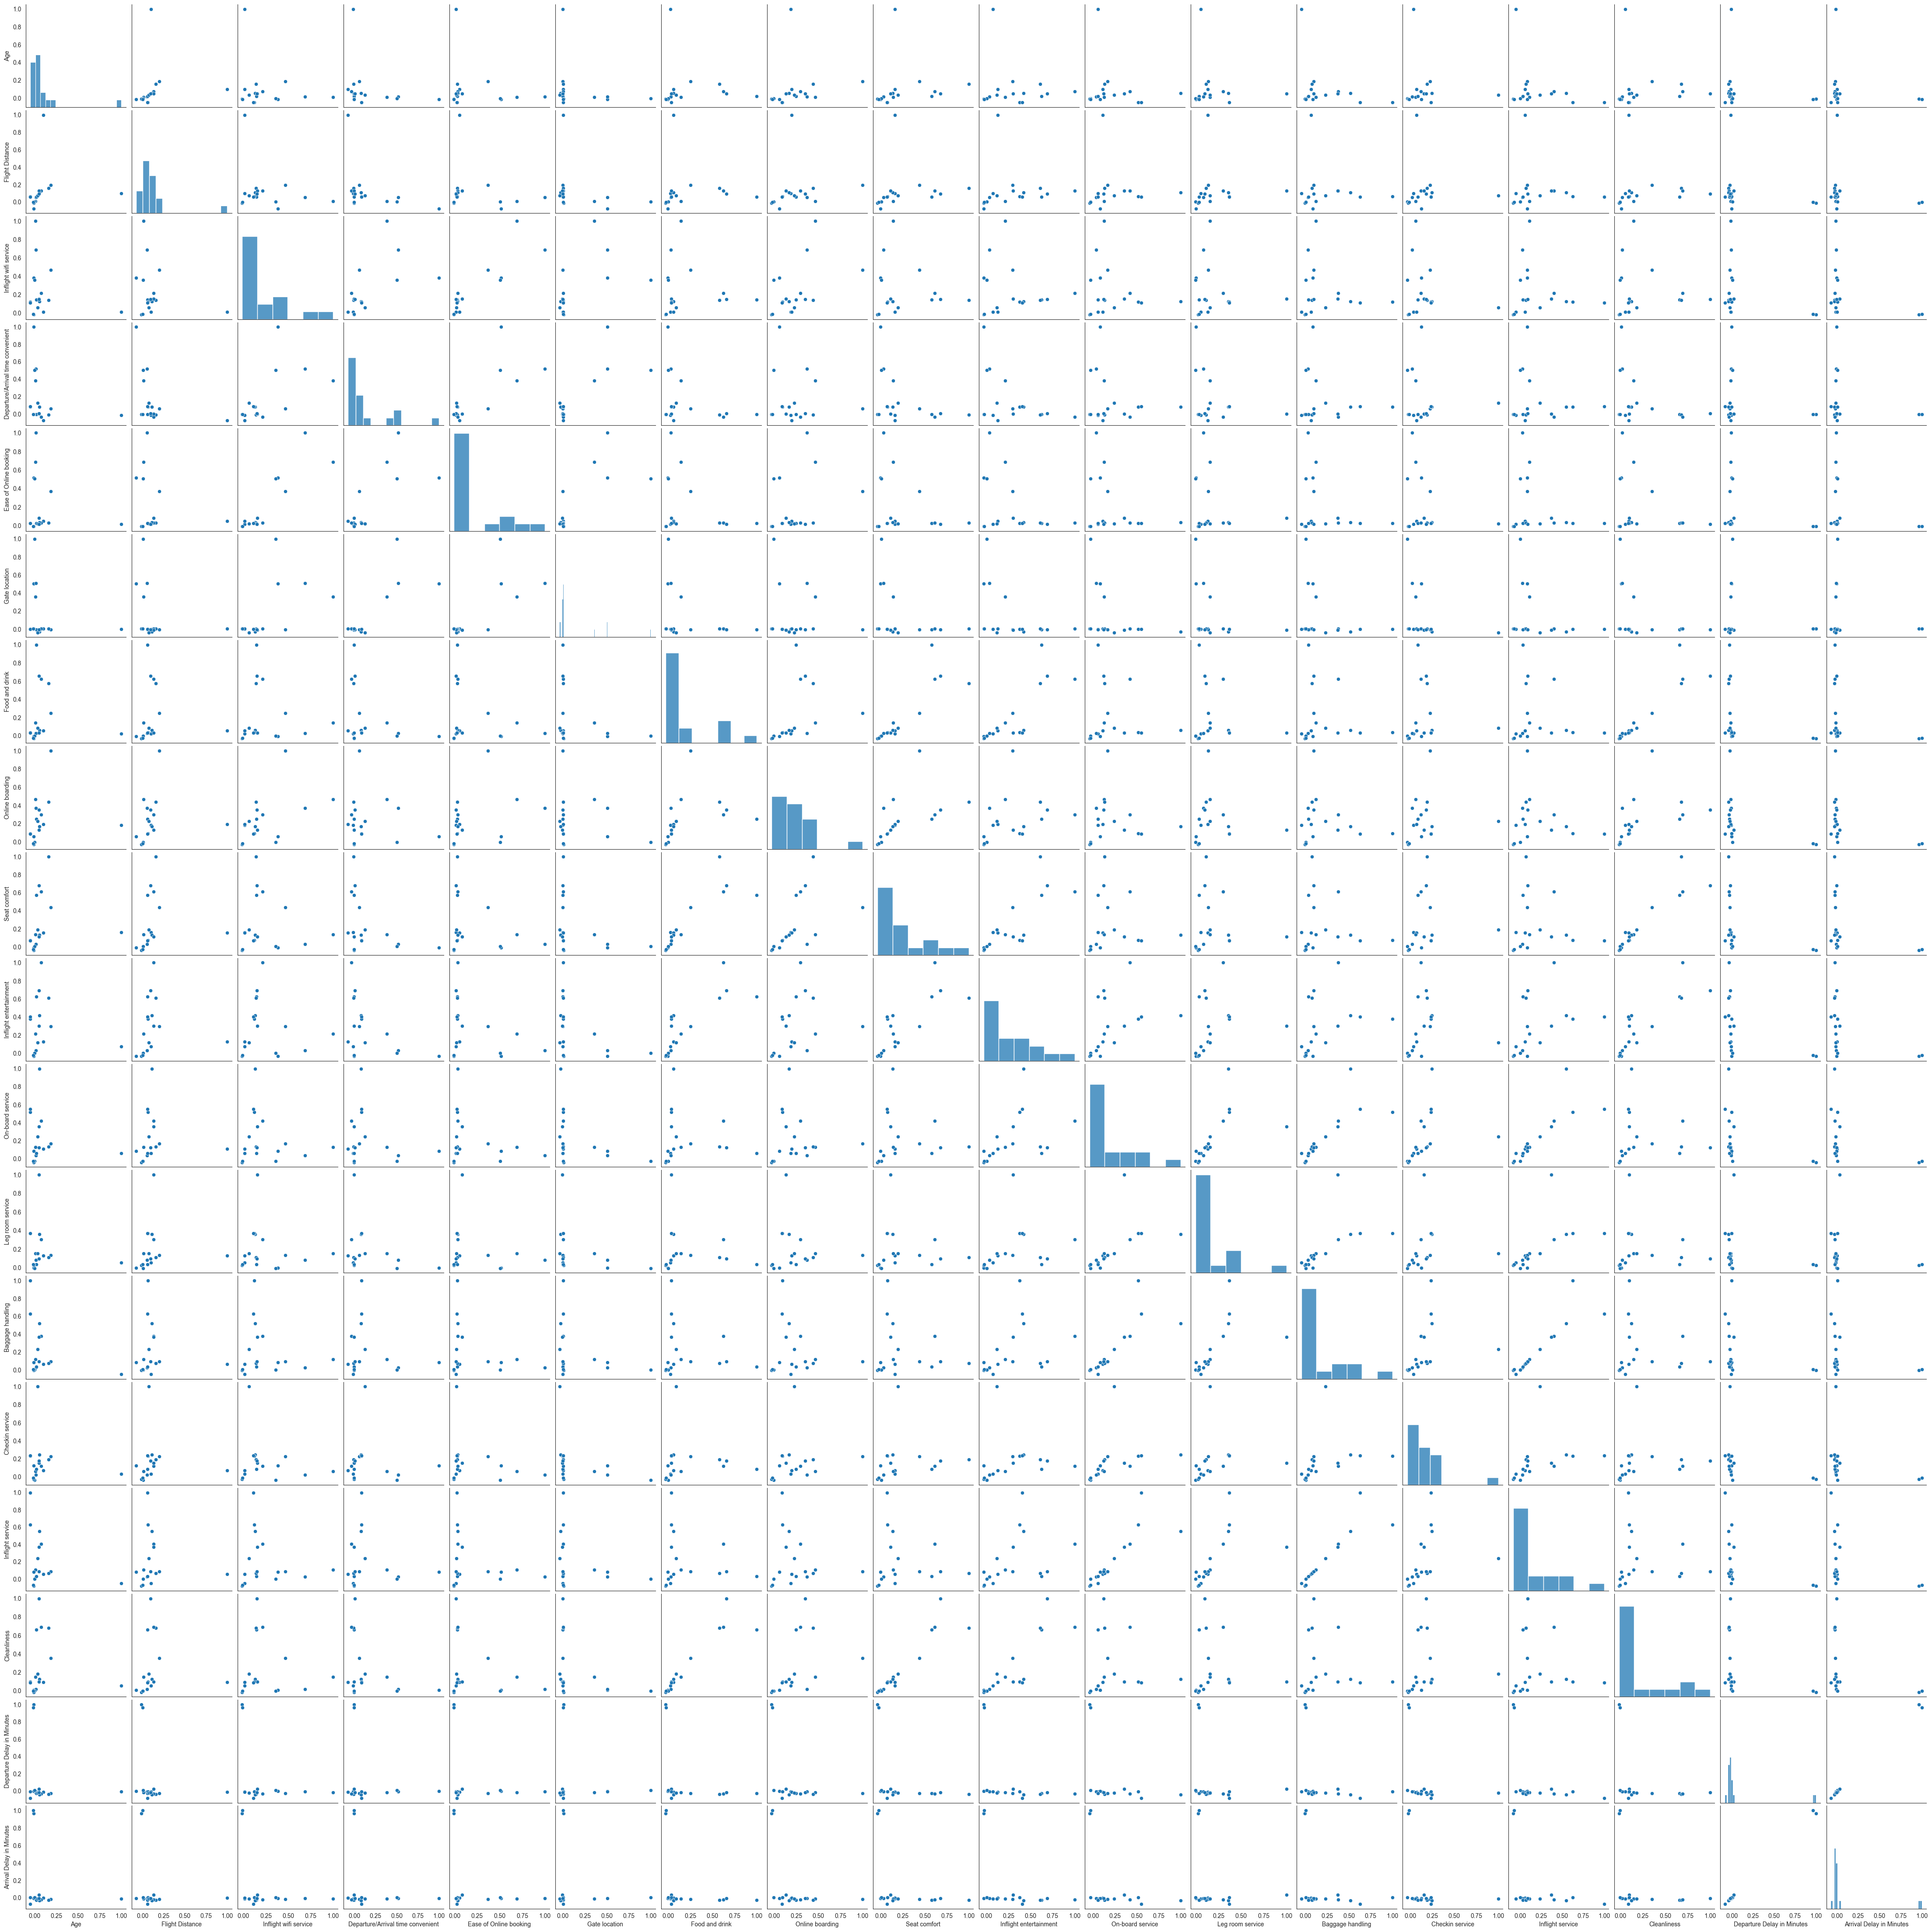

In [40]:
# multi-variate questions
sns.pairplot(df.select_dtypes(include='number').corr())

******************

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Imbalanced: X_train_resampled
* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [41]:
# a) Detect & Handle Duplicates
df.duplicated().sum()

np.int64(0)

In [42]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                    3.0   
1                   235                    3.0   
2                  1142                    2.0   
3                   562                    2.0   
4                   214                    3.0   
...                 ...                    ...   
103899              192                    2.0   
103900             2347                    4.0   
103901             1995                    1.0   
103902             1000                    1.0   
103903             1723                    1.0   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                     4.0                     3.0   
1                                     2.0                     3.0   
2                                     2.0                     2.0   
3                                     5.0                     5.0   
4                                     3.0                     3.0   
...                                   ...                     ...   
103899                                1.0                     2.0   
103900                                4.0                     4.0   
103901                                1.0                     1.0   
103902                                1.0                     1.0   
103903                                3.0                     3.0   

        Gate location  ...  Inflight entertainment  On-board service  \
0                 1.0  ...                     5.0               4.0   
1                 3.0  ...                     1.0               1.0   
2                 2.0  ...                     5.0               4.0   
3                 5.0  ...                     2.0               2.0   
4                 3.0  ...                     3.0               3.0   
...               ...  ...                     ...               ...   
103899            3.0  ...                     2.0               3.0   
103900            4.0  ...                     5.0               5.0   
103901            3.0  ...                     4.0               3.0   
103902            5.0  ...                     1.0               4.0   
103903            3.0  ...                     1.0               1.0   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                    3.0                 4              4.0               5.0   
1                    5.0                 3              1.0               4.0   
2                    3.0                 4              4.0               4.0   
3                    5.0                 3              1.0               4.0   
4                    4.0                 4              3.0               3.0   
...                  ...               ...              ...               ...   
103899               1.0                 4              2.0               3.0   
103900               5.0                 5              5.0               5.0   
103901               2.0                 4              5.0               5.0   
103902               5.0                 1              5.0               

In [43]:
df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                    3.0                                4.0   
1                    3.0                                2.0   
2                    2.0                                2.0   
3                    2.0                                5.0   
4                    3.0                                3.0   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                     3.0            1.0  ...                     5.0   
1                     3.0            3.0  ...                     1.0   
2                     2.0            2.0  ...                     5.0   
3                     5.0            5.0  ...                     2.0   
4                     3.0            3.0  ...                     3.0   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0               4.0               3.0                 4              4.0   
1               1.0               5.0                 3              1.0   
2               4.0               3.0                 4              4.0   
3               2.0               5.0                 3              1.0   
4               3.0               4.0                 4              3.0   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0               5.0          5.0                        25.0   
1               4.0          1.0                         1.0   
2               4.0          5.0                         NaN   
3               4.0          2.0                        11.0   
4               3.0          3.0                         NaN   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       NaN                satisfied  
3                       9.0  neutral or dissatisfied  
4                       NaN                satisfied  

[5 rows x 23 columns]

*************************

### b) train_test_split

In [44]:
# split data into features and target
X = df.drop('satisfaction', axis=1) 
y =  df['satisfaction'] 
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

In [45]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1) 
y =  df['satisfaction'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42) #stratify=y to make stratify in my data = y (at classifcation problem)
X_train

Gender      Customer Type  Age   Type of Travel     Class  \
30633  Female     Loyal Customer   47  Business travel  Business   
98857    Male  disloyal Customer   35  Business travel  Business   
80498  Female     Loyal Customer   66  Personal Travel       Eco   
73981    Male  disloyal Customer   26  Business travel       Eco   
70633    Male     Loyal Customer   48  Personal Travel       Eco   
...       ...                ...  ...              ...       ...   
63485    Male  disloyal Customer   36  Business travel  Business   
44955    Male     Loyal Customer   46  Business travel  Business   
53762    Male     Loyal Customer   55  Business travel  Business   
32633    Male  disloyal Customer   33  Business travel       Eco   
67623    Male  disloyal Customer   20  Business travel  Business   

       Flight Distance  Inflight wifi service  \
30633             1521                    3.0   
98857             2586                    3.0   
80498              550                    2.0   
73981             1269                    5.0   
70633              738                    1.0   
...                ...                    ...   
63485              368                    2.0   
44955              473                    1.0   
53762              135                    5.0   
32633             1585                    2.0   
67623             1164                    NaN   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                     3.0   
98857                                3.0                     3.0   
80498                                4.0                     2.0   
73981                                4.0                     4.0   
70633                                5.0                     NaN   
...                                  ...                     ...   
63485                                2.0                     2.0   
44955                                1.0                     1.0   
53762                                5.0                     5.0   
32633                                2.0                     2.0   
67623                                1.0                     NaN   

       Gate location  ...  Seat comfort  Inflight entertainment  \
30633            3.0  ...           5.0                     4.0   
98857            4.0  ...           5.0                     3.0   
80498            2.0  ...           5.0                     4.0   
73981            1.0  ...           3.0                     3.0   
70633            2.0  ...           4.0                     4.0   
...              ...  ...           ...                     ...   
63485            4.0  ...           3.0                     3.0   
44955            1.0  ...           4.0                     5.0   
53762            5.0  ...           4.0                     5.0   
32633            3.0  ...           5.0                     1.0   
67623            3.0  ...           1.0                     1.0   

       On-board service  Leg room service  Baggage handling  Checkin service  \
30633               4.0               4.0                 4              4.0   
98857               5.0               5.0                 5              5.0   
80498               4.0               2.0                 4              3.0   
73981               5.0               1.0                 5              3.0   
70633               5.0               2.0                 4              3.0   
...                 ...               ...               ...              ...   
63485               3.0               5.0                 5              5.0   
44955               5.0               5.0                 5              5.0   
53762               5.0               5.0                 5              5.0   
32633               4.0               4.0                 3              3.0   
67623               3.0               3.0                 4              3.0   

       Inflight se

In [46]:
X_test

Gender      Customer Type  Age   Type of Travel     Class  \
89374  Female  disloyal Customer   32  Business travel  Business   
8211     Male     Loyal Customer   34  Business travel  Business   
94614    Male  disloyal Customer   27  Business travel  Business   
62313    Male     Loyal Customer   35  Business travel  Business   
41609  Female     Loyal Customer   26  Personal Travel       Eco   
...       ...                ...  ...              ...       ...   
76803  Female     Loyal Customer   26  Personal Travel       Eco   
3408     Male     Loyal Customer   60  Business travel  Business   
20516    Male     Loyal Customer   54  Business travel  Business   
66410    Male     Loyal Customer   45  Personal Travel       Eco   
7996   Female     Loyal Customer   54  Business travel  Business   

       Flight Distance  Inflight wifi service  \
89374              515                    3.0   
8211               236                    2.0   
94614              130                    4.0   
62313              301                    3.0   
41609              101                    2.0   
...                ...                    ...   
76803             1449                    2.0   
3408               220                    1.0   
20516             1670                    4.0   
66410              488                    2.0   
7996              1609                    4.0   

       Departure/Arrival time convenient  Ease of Online booking  \
89374                                3.0                     3.0   
8211                                 1.0                     1.0   
94614                                4.0                     4.0   
62313                                3.0                     3.0   
41609                                5.0                     2.0   
...                                  ...                     ...   
76803                                5.0                     2.0   
3408                                 1.0                     1.0   
20516                                4.0                     4.0   
66410                                5.0                     5.0   
7996                                 4.0                     4.0   

       Gate location  ...  Seat comfort  Inflight entertainment  \
89374            4.0  ...           2.0                     2.0   
8211             1.0  ...           3.0                     2.0   
94614            1.0  ...           3.0                     3.0   
62313            3.0  ...           3.0                     3.0   
41609            3.0  ...           3.0                     3.0   
...              ...  ...           ...                     ...   
76803            4.0  ...           1.0                     1.0   
3408             1.0  ...           5.0                     5.0   
20516            4.0  ...           5.0                     4.0   
66410            4.0  ...           5.0                     5.0   
7996             4.0  ...           4.0                     5.0   

       On-board service  Leg room service  Baggage handling  Checkin service  \
89374               4.0               4.0                 5              5.0   
8211                2.0               2.0                 2              2.0   
94614               5.0               2.0                 4              3.0   
62313               3.0               3.0                 3              2.0   
41609               3.0               3.0                 4              5.0   
...                 ...               ...               ...              ...   
76803               5.0               5.0                 2              1.0   
3408                5.0               5.0                 5              4.0   
20516               4.0               4.0                 4              3.0   
66410               3.0               4.0                 5              5.0   
7996                5.0               5.0                 5              3.0   

       Inflight se

In [47]:
X_test.shape

(20781, 22)

In [48]:
y_train

30633                  satisfied
98857    neutral or dissatisfied
80498    neutral or dissatisfied
73981                  satisfied
70633    neutral or dissatisfied
                  ...           
63485    neutral or dissatisfied
44955                  satisfied
53762                  satisfied
32633    neutral or dissatisfied
67623                  satisfied
Name: satisfaction, Length: 83123, dtype: object

In [49]:
y_train.value_counts(normalize=True) * 100

satisfaction
neutral or dissatisfied    56.666627
satisfied                  43.333373
Name: proportion, dtype: float64

In [50]:
#Test split
y_test.value_counts(normalize=True) * 100

satisfaction
neutral or dissatisfied    56.667148
satisfied                  43.332852
Name: proportion, dtype: float64

************

## c) Detect & Handle NaNs

In [51]:
X_train.isna().sum()

Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 2451
Departure/Arrival time convenient     4276
Ease of Online booking                3562
Gate location                            1
Food and drink                          88
Online boarding                       1942
Seat comfort                             0
Inflight entertainment                  13
On-board service                         3
Leg room service                       371
Baggage handling                         0
Checkin service                          0
Inflight service                         3
Cleanliness                             10
Departure Delay in Minutes           46952
Arrival Delay in Minutes             46677
dtype: int64

In [52]:
# Detect NaNs in numeric column
df['Arrival Delay in Minutes'] = pd.to_numeric(df['Arrival Delay in Minutes'], errors='coerce')
df['Arrival Delay in Minutes']

0         18.0
1          6.0
2          NaN
3          9.0
4          NaN
          ... 
103899     NaN
103900     NaN
103901    14.0
103902     NaN
103903     NaN
Name: Arrival Delay in Minutes, Length: 103904, dtype: float64

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

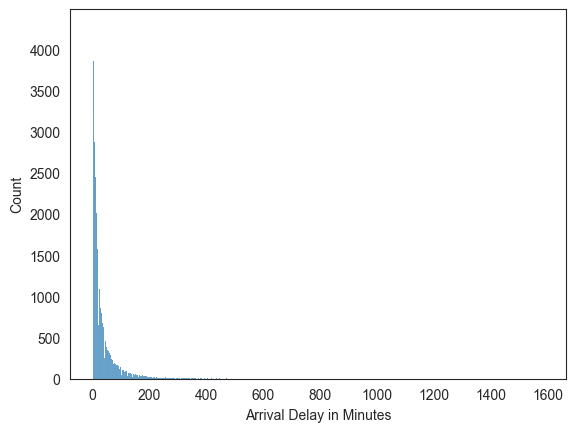

In [53]:
sns.histplot(df['Arrival Delay in Minutes']) # outliers 

In [54]:
# Handle Nan Arrival Delay in Minutes
Arrival_Delay_in_Minutes_imputer = SimpleImputer(strategy='median')
X_train[['Arrival Delay in Minutes']] = Arrival_Delay_in_Minutes_imputer.fit_transform(X_train[['Arrival Delay in Minutes']])
X_train

Gender      Customer Type  Age   Type of Travel     Class  \
30633  Female     Loyal Customer   47  Business travel  Business   
98857    Male  disloyal Customer   35  Business travel  Business   
80498  Female     Loyal Customer   66  Personal Travel       Eco   
73981    Male  disloyal Customer   26  Business travel       Eco   
70633    Male     Loyal Customer   48  Personal Travel       Eco   
...       ...                ...  ...              ...       ...   
63485    Male  disloyal Customer   36  Business travel  Business   
44955    Male     Loyal Customer   46  Business travel  Business   
53762    Male     Loyal Customer   55  Business travel  Business   
32633    Male  disloyal Customer   33  Business travel       Eco   
67623    Male  disloyal Customer   20  Business travel  Business   

       Flight Distance  Inflight wifi service  \
30633             1521                    3.0   
98857             2586                    3.0   
80498              550                    2.0   
73981             1269                    5.0   
70633              738                    1.0   
...                ...                    ...   
63485              368                    2.0   
44955              473                    1.0   
53762              135                    5.0   
32633             1585                    2.0   
67623             1164                    NaN   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                     3.0   
98857                                3.0                     3.0   
80498                                4.0                     2.0   
73981                                4.0                     4.0   
70633                                5.0                     NaN   
...                                  ...                     ...   
63485                                2.0                     2.0   
44955                                1.0                     1.0   
53762                                5.0                     5.0   
32633                                2.0                     2.0   
67623                                1.0                     NaN   

       Gate location  ...  Seat comfort  Inflight entertainment  \
30633            3.0  ...           5.0                     4.0   
98857            4.0  ...           5.0                     3.0   
80498            2.0  ...           5.0                     4.0   
73981            1.0  ...           3.0                     3.0   
70633            2.0  ...           4.0                     4.0   
...              ...  ...           ...                     ...   
63485            4.0  ...           3.0                     3.0   
44955            1.0  ...           4.0                     5.0   
53762            5.0  ...           4.0                     5.0   
32633            3.0  ...           5.0                     1.0   
67623            3.0  ...           1.0                     1.0   

       On-board service  Leg room service  Baggage handling  Checkin service  \
30633               4.0               4.0                 4              4.0   
98857               5.0               5.0                 5              5.0   
80498               4.0               2.0                 4              3.0   
73981               5.0               1.0                 5              3.0   
70633               5.0               2.0                 4              3.0   
...                 ...               ...               ...              ...   
63485               3.0               5.0                 5              5.0   
44955               5.0               5.0                 5              5.0   
53762               5.0               5.0                 5              5.0   
32633               4.0               4.0                 3              3.0   
67623               3.0               3.0                 4              3.0   

       Inflight se

In [55]:
# fit X_train #data snooping
median_imputer = SimpleImputer(strategy='median')
median_imputer.fit(X_train[['Arrival Delay in Minutes']])

SimpleImputer(strategy='median')

In [56]:
X_train[['Arrival Delay in Minutes']] = median_imputer.fit_transform(X_train[['Arrival Delay in Minutes']])
X_train[['Arrival Delay in Minutes']]

Arrival Delay in Minutes
30633                      17.0
98857                      17.0
80498                      82.0
73981                      17.0
70633                      49.0
...                         ...
63485                      25.0
44955                      17.0
53762                      17.0
32633                      30.0
67623                      16.0

[83123 rows x 1 columns]

In [57]:
X_test[['Arrival Delay in Minutes']] = median_imputer.transform(X_test[['Arrival Delay in Minutes']])
X_test[['Arrival Delay in Minutes']]

Arrival Delay in Minutes
89374                      17.0
8211                       17.0
94614                      17.0
62313                      17.0
41609                       1.0
...                         ...
76803                       2.0
3408                       17.0
20516                      17.0
66410                      17.0
7996                        9.0

[20781 rows x 1 columns]

In [58]:
X_train.isna().sum()

Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 2451
Departure/Arrival time convenient     4276
Ease of Online booking                3562
Gate location                            1
Food and drink                          88
Online boarding                       1942
Seat comfort                             0
Inflight entertainment                  13
On-board service                         3
Leg room service                       371
Baggage handling                         0
Checkin service                          0
Inflight service                         3
Cleanliness                             10
Departure Delay in Minutes           46952
Arrival Delay in Minutes                 0
dtype: int64

In [59]:
# Detect NaNs in numeric column Inflight wifi service
df['Inflight wifi service'] = pd.to_numeric(df['Inflight wifi service'], errors='coerce')
df['Inflight wifi service']

0         3.0
1         3.0
2         2.0
3         2.0
4         3.0
         ... 
103899    2.0
103900    4.0
103901    1.0
103902    1.0
103903    1.0
Name: Inflight wifi service, Length: 103904, dtype: float64

<Axes: xlabel='Inflight wifi service', ylabel='Count'>

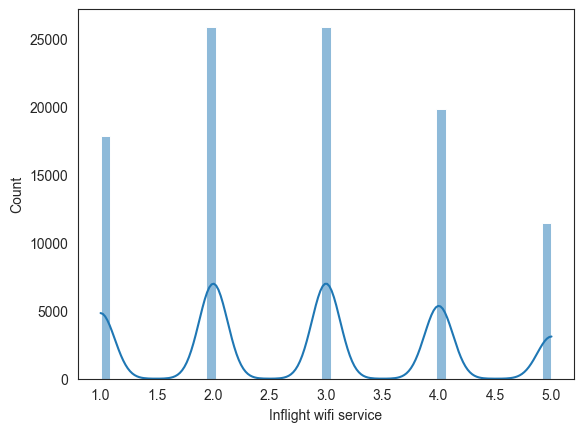

In [60]:
# Inflight wifi service
sns.histplot(df['Inflight wifi service'], kde=True) 
# Inflight wifi service is Normal

In [61]:
# Handle Nan Inflight wifi service
Arrival_Delay_in_Minutes_imputer = SimpleImputer(strategy='mean')
X_train[['Inflight wifi service']] = Arrival_Delay_in_Minutes_imputer.fit_transform(X_train[['Inflight wifi service']])
X_train

Gender      Customer Type  Age   Type of Travel     Class  \
30633  Female     Loyal Customer   47  Business travel  Business   
98857    Male  disloyal Customer   35  Business travel  Business   
80498  Female     Loyal Customer   66  Personal Travel       Eco   
73981    Male  disloyal Customer   26  Business travel       Eco   
70633    Male     Loyal Customer   48  Personal Travel       Eco   
...       ...                ...  ...              ...       ...   
63485    Male  disloyal Customer   36  Business travel  Business   
44955    Male     Loyal Customer   46  Business travel  Business   
53762    Male     Loyal Customer   55  Business travel  Business   
32633    Male  disloyal Customer   33  Business travel       Eco   
67623    Male  disloyal Customer   20  Business travel  Business   

       Flight Distance  Inflight wifi service  \
30633             1521               3.000000   
98857             2586               3.000000   
80498              550               2.000000   
73981             1269               5.000000   
70633              738               1.000000   
...                ...                    ...   
63485              368               2.000000   
44955              473               1.000000   
53762              135               5.000000   
32633             1585               2.000000   
67623             1164               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                     3.0   
98857                                3.0                     3.0   
80498                                4.0                     2.0   
73981                                4.0                     4.0   
70633                                5.0                     NaN   
...                                  ...                     ...   
63485                                2.0                     2.0   
44955                                1.0                     1.0   
53762                                5.0                     5.0   
32633                                2.0                     2.0   
67623                                1.0                     NaN   

       Gate location  ...  Seat comfort  Inflight entertainment  \
30633            3.0  ...           5.0                     4.0   
98857            4.0  ...           5.0                     3.0   
80498            2.0  ...           5.0                     4.0   
73981            1.0  ...           3.0                     3.0   
70633            2.0  ...           4.0                     4.0   
...              ...  ...           ...                     ...   
63485            4.0  ...           3.0                     3.0   
44955            1.0  ...           4.0                     5.0   
53762            5.0  ...           4.0                     5.0   
32633            3.0  ...           5.0                     1.0   
67623            3.0  ...           1.0                     1.0   

       On-board service  Leg room service  Baggage handling  Checkin service  \
30633               4.0               4.0                 4              4.0   
98857               5.0               5.0                 5              5.0   
80498               4.0               2.0                 4              3.0   
73981               5.0               1.0                 5              3.0   
70633               5.0               2.0                 4              3.0   
...                 ...               ...               ...              ...   
63485               3.0               5.0                 5              5.0   
44955               5.0               5.0                 5              5.0   
53762               5.0               5.0                 5              5.0   
32633               4.0               4.0                 3              3.0   
67623               3.0               3.0                 4              3.0   

       Inflight se

In [62]:
# fit X_train #data snooping
median_imputer = SimpleImputer(strategy='mean')
median_imputer.fit(X_train[['Inflight wifi service']])

SimpleImputer()

In [63]:
X_train[['Inflight wifi service']] = median_imputer.fit_transform(X_train[['Inflight wifi service']])
X_train[['Inflight wifi service']]

Inflight wifi service
30633               3.000000
98857               3.000000
80498               2.000000
73981               5.000000
70633               1.000000
...                      ...
63485               2.000000
44955               1.000000
53762               5.000000
32633               2.000000
67623               2.814508

[83123 rows x 1 columns]

In [64]:
X_test[['Inflight wifi service']] = median_imputer.transform(X_test[['Inflight wifi service']])
X_test[['Inflight wifi service']]

Inflight wifi service
89374                    3.0
8211                     2.0
94614                    4.0
62313                    3.0
41609                    2.0
...                      ...
76803                    2.0
3408                     1.0
20516                    4.0
66410                    2.0
7996                     4.0

[20781 rows x 1 columns]

In [65]:
X_train.isna().sum()

Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                    0
Departure/Arrival time convenient     4276
Ease of Online booking                3562
Gate location                            1
Food and drink                          88
Online boarding                       1942
Seat comfort                             0
Inflight entertainment                  13
On-board service                         3
Leg room service                       371
Baggage handling                         0
Checkin service                          0
Inflight service                         3
Cleanliness                             10
Departure Delay in Minutes           46952
Arrival Delay in Minutes                 0
dtype: int64

In [66]:
# Detect NaNs in numeric column Inflight wifi service
df['Departure/Arrival time convenient'] = pd.to_numeric(df['Departure/Arrival time convenient'], errors='coerce')
df['Departure/Arrival time convenient']

0         4.0
1         2.0
2         2.0
3         5.0
4         3.0
         ... 
103899    1.0
103900    4.0
103901    1.0
103902    1.0
103903    3.0
Name: Departure/Arrival time convenient, Length: 103904, dtype: float64

<Axes: xlabel='Departure/Arrival time convenient', ylabel='Count'>

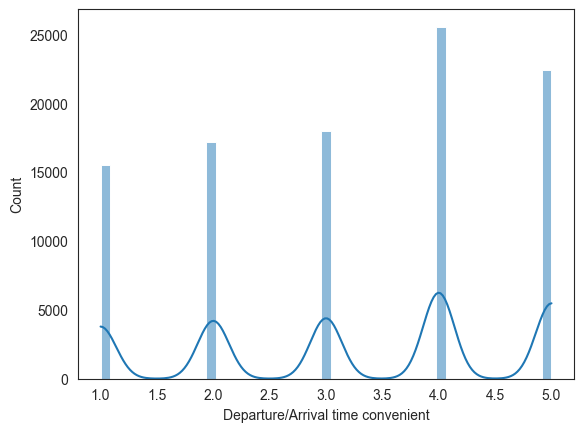

In [67]:
# Departure/Arrival time convenient 
sns.histplot(df['Departure/Arrival time convenient'], kde=True) # 
# Departure/Arrival time convenient  Normal 

<Axes: xlabel='Ease of Online booking', ylabel='Count'>

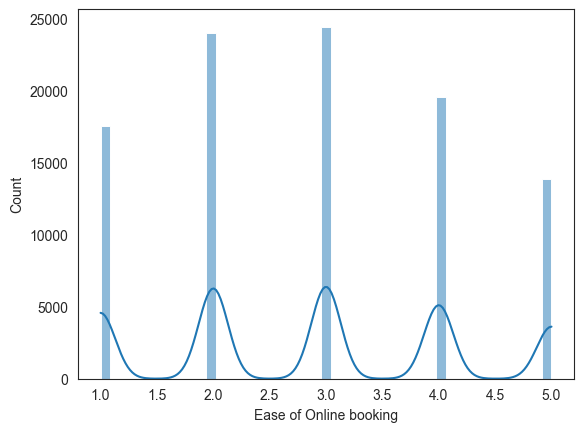

In [68]:
# Ease of Online booking 
sns.histplot(df['Ease of Online booking'], kde=True)
# Normal

<Axes: xlabel='Gate location', ylabel='Count'>

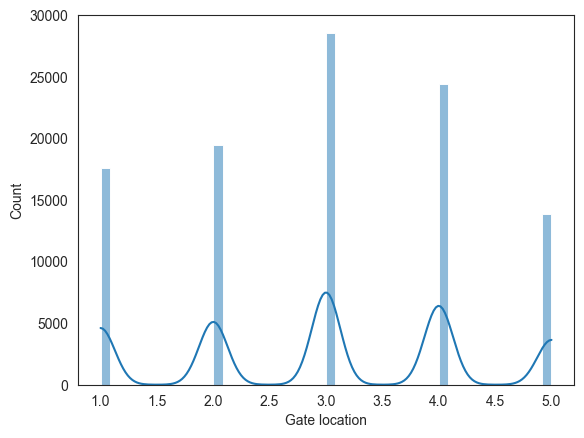

In [69]:
# Gate location
sns.histplot(df["Gate location"], kde=True)

<Axes: xlabel='Food and drink', ylabel='Count'>

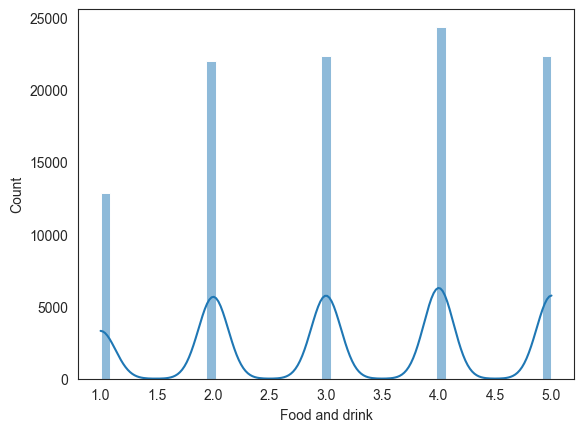

In [70]:
# Food and drink
sns.histplot(df["Food and drink"], kde=True)

<Axes: xlabel='Online boarding', ylabel='Count'>

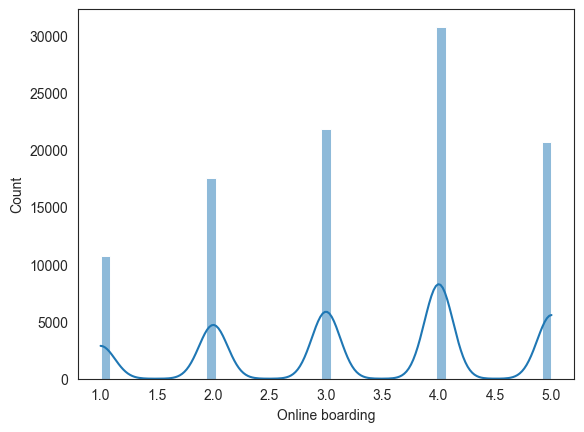

In [71]:
# Online boarding 
sns.histplot(df["Online boarding"], kde=True)

<Axes: xlabel='Seat comfort', ylabel='Count'>

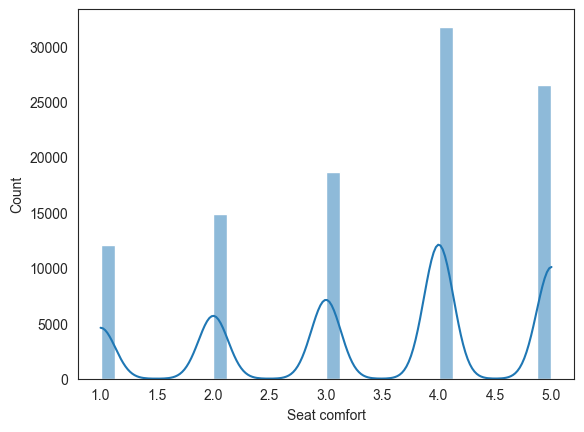

In [72]:
# Inflight entertainment, On-board service ,Leg room service,  Checkin service ,  Inflight service, Cleanliness
sns.histplot(df["Seat comfort"], kde=True)        

<Axes: xlabel='Inflight entertainment', ylabel='Count'>

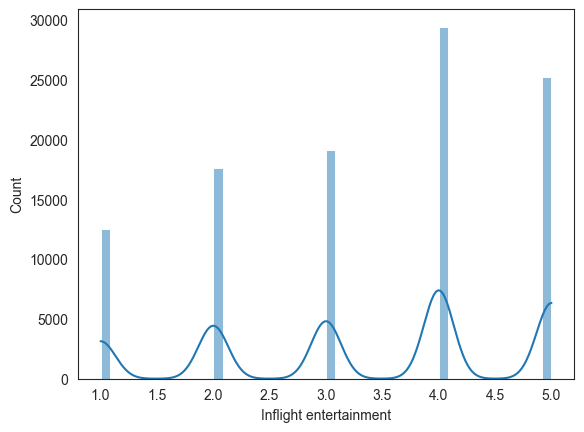

In [73]:
# , On-board service ,Leg room service,  Checkin service ,  Inflight service, Cleanliness
sns.histplot(df["Inflight entertainment"], kde=True)        

<Axes: xlabel='On-board service', ylabel='Count'>

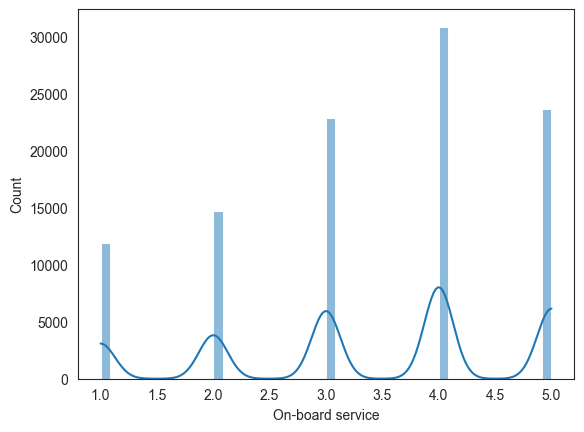

In [74]:
# Leg room service,  Checkin service ,  Inflight service, Cleanliness
sns.histplot(df["On-board service"], kde=True)        

<Axes: xlabel='Leg room service', ylabel='Count'>

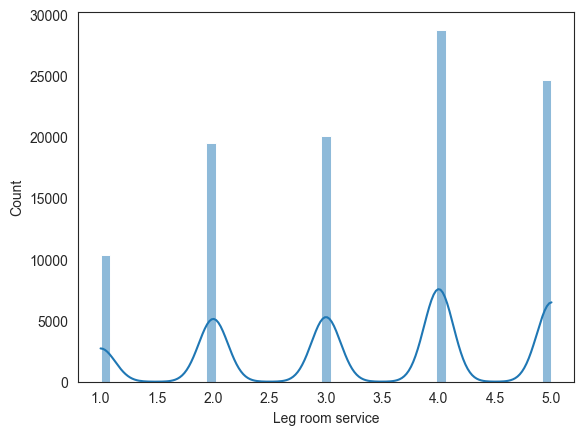

In [75]:
#Checkin service ,  Inflight service, Cleanliness
sns.histplot(df["Leg room service"], kde=True)  

<Axes: xlabel='Checkin service', ylabel='Count'>

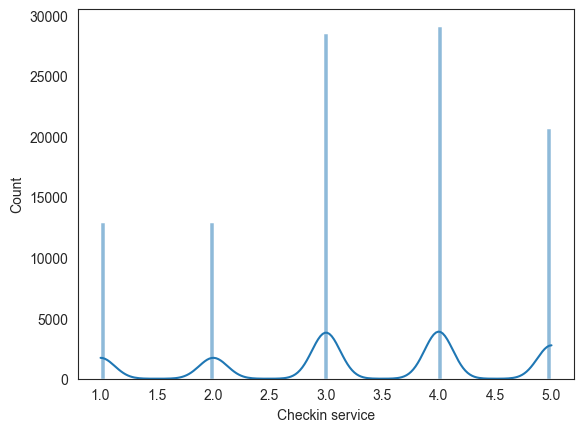

In [76]:
#Inflight service, Cleanliness
sns.histplot(df["Checkin service"], kde=True)  

<Axes: xlabel='Inflight service', ylabel='Count'>

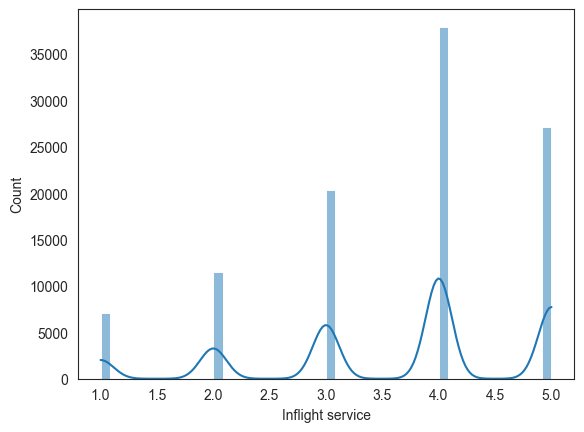

In [77]:
#
sns.histplot(df["Inflight service"], kde=True) 

<Axes: xlabel='Cleanliness', ylabel='Count'>

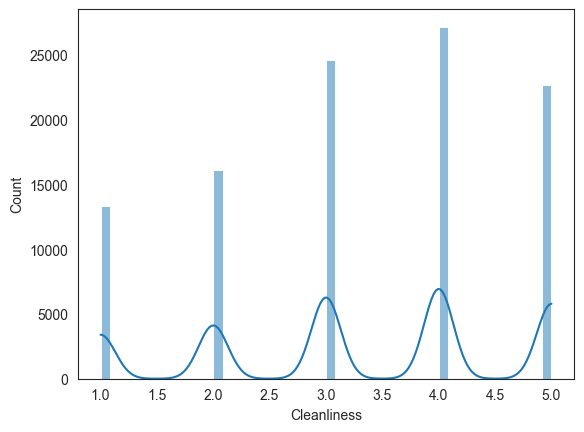

In [78]:
 
sns.histplot(df["Cleanliness"], kde=True) 

In [79]:
X_train.isna().sum()

Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                    0
Departure/Arrival time convenient     4276
Ease of Online booking                3562
Gate location                            1
Food and drink                          88
Online boarding                       1942
Seat comfort                             0
Inflight entertainment                  13
On-board service                         3
Leg room service                       371
Baggage handling                         0
Checkin service                          0
Inflight service                         3
Cleanliness                             10
Departure Delay in Minutes           46952
Arrival Delay in Minutes                 0
dtype: int64

In [80]:
# Handle Nan Departure/Arrival time convenient, Ease of Online booking , Gate location ,  Food and drink , Online boarding , Inflight entertainment ,On-board service , Leg room service, Inflight service,Cleanliness ,Departure Delay in Minutes 
normal_imputer = SimpleImputer(strategy='mean')
X_train[["Departure/Arrival time convenient", "Ease of Online booking", "Gate location",  "Food and drink", "Online boarding", "Inflight entertainment","On-board service", "Leg room service", "Inflight service","Cleanliness","Departure Delay in Minutes"]] = normal_imputer.fit_transform(X_train[["Departure/Arrival time convenient", "Ease of Online booking", "Gate location",  "Food and drink", "Online boarding", "Inflight entertainment","On-board service", "Leg room service", "Inflight service","Cleanliness","Departure Delay in Minutes"]])
X_train

Gender      Customer Type  Age   Type of Travel     Class  \
30633  Female     Loyal Customer   47  Business travel  Business   
98857    Male  disloyal Customer   35  Business travel  Business   
80498  Female     Loyal Customer   66  Personal Travel       Eco   
73981    Male  disloyal Customer   26  Business travel       Eco   
70633    Male     Loyal Customer   48  Personal Travel       Eco   
...       ...                ...  ...              ...       ...   
63485    Male  disloyal Customer   36  Business travel  Business   
44955    Male     Loyal Customer   46  Business travel  Business   
53762    Male     Loyal Customer   55  Business travel  Business   
32633    Male  disloyal Customer   33  Business travel       Eco   
67623    Male  disloyal Customer   20  Business travel  Business   

       Flight Distance  Inflight wifi service  \
30633             1521               3.000000   
98857             2586               3.000000   
80498              550               2.000000   
73981             1269               5.000000   
70633              738               1.000000   
...                ...                    ...   
63485              368               2.000000   
44955              473               1.000000   
53762              135               5.000000   
32633             1585               2.000000   
67623             1164               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  ...  Seat comfort  Inflight entertainment  \
30633            3.0  ...           5.0                     4.0   
98857            4.0  ...           5.0                     3.0   
80498            2.0  ...           5.0                     4.0   
73981            1.0  ...           3.0                     3.0   
70633            2.0  ...           4.0                     4.0   
...              ...  ...           ...                     ...   
63485            4.0  ...           3.0                     3.0   
44955            1.0  ...           4.0                     5.0   
53762            5.0  ...           4.0                     5.0   
32633            3.0  ...           5.0                     1.0   
67623            3.0  ...           1.0                     1.0   

       On-board service  Leg room service  Baggage handling  Checkin service  \
30633               4.0               4.0                 4              4.0   
98857               5.0               5.0                 5              5.0   
80498               4.0               2.0                 4              3.0   
73981               5.0               1.0                 5              3.0   
70633               5.0               2.0                 4              3.0   
...                 ...               ...               ...              ...   
63485               3.0               5.0                 5              5.0   
44955               5.0               5.0                 5              5.0   
53762               5.0               5.0                 5              5.0   
32633               4.0               4.0                 3              3.0   
67623               3.0               3.0                 4              3.0   

       Inflight se

In [81]:
# fit X_train #data snooping
median_imputer = SimpleImputer(strategy='mean')
median_imputer.fit(X_train[["Departure/Arrival time convenient", "Ease of Online booking", "Gate location",  "Food and drink", "Online boarding", "Inflight entertainment","On-board service", "Leg room service", "Inflight service","Cleanliness","Departure Delay in Minutes"]])

SimpleImputer()

In [82]:
X_train[["Departure/Arrival time convenient", "Ease of Online booking", "Gate location",  "Food and drink", "Online boarding", "Inflight entertainment","On-board service", "Leg room service", "Inflight service","Cleanliness","Departure Delay in Minutes"]] = median_imputer.fit_transform(X_train[["Departure/Arrival time convenient", "Ease of Online booking", "Gate location",  "Food and drink", "Online boarding", "Inflight entertainment","On-board service", "Leg room service", "Inflight service","Cleanliness","Departure Delay in Minutes"]])
X_train[["Departure/Arrival time convenient", "Ease of Online booking", "Gate location",  "Food and drink", "Online boarding", "Inflight entertainment","On-board service", "Leg room service", "Inflight service","Cleanliness","Departure Delay in Minutes"]]

Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  Food and drink  Online boarding  Inflight entertainment  \
30633            3.0             5.0         4.000000                     4.0   
98857            4.0             3.0         3.000000                     3.0   
80498            2.0             5.0         4.000000                     4.0   
73981            1.0             3.0         5.000000                     3.0   
70633            2.0             4.0         3.327404                     4.0   
...              ...             ...              ...                     ...   
63485            4.0             3.0         2.000000                     3.0   
44955            1.0             5.0         4.000000                     5.0   
53762            5.0             2.0         5.000000                     5.0   
32633            3.0             1.0         2.000000                     1.0   
67623            3.0             1.0         3.327404                     1.0   

       On-board service  Leg room service  Inflight service  Cleanliness  \
30633               4.0               4.0               4.0          3.0   
98857               5.0               5.0               4.0          3.0   
80498               4.0               2.0               4.0          5.0   
73981               5.0               1.0               4.0          3.0   
70633               5.0               2.0               5.0          4.0   
...                 ...               ...               ...          ...   
63485               3.0               5.0               5.0          3.0   
44955               5.0               5.0               5.0          3.0   
53762               5.0               5.0               5.0          5.0   
32633               4.0               4.0               3.0          1.0   
67623               3.0               3.0               5.0          1.0   

       Departure Delay in Minutes  
30633                   34.184291  
98857                   34.184291  
80498                   78.000000  
73981                   34.184291  
70633                   64.000000  
...                           ...  
63485                   26.000000  
44955                   34.184291  
53762                   34.184291  
32633                   26.000000  
67623                   41.000000  

[83123 rows x 11 columns]

In [83]:
X_test[["Departure/Arrival time convenient", "Ease of Online booking", "Gate location",  "Food and drink", "Online boarding", "Inflight entertainment","On-board service", "Leg room service", "Inflight service","Cleanliness","Departure Delay in Minutes"]] = median_imputer.transform(X_test[["Departure/Arrival time convenient", "Ease of Online booking", "Gate location",  "Food and drink", "Online boarding", "Inflight entertainment","On-board service", "Leg room service", "Inflight service","Cleanliness","Departure Delay in Minutes"]])
X_test[["Departure/Arrival time convenient", "Ease of Online booking", "Gate location",  "Food and drink", "Online boarding", "Inflight entertainment","On-board service", "Leg room service", "Inflight service","Cleanliness","Departure Delay in Minutes"]]

Departure/Arrival time convenient  Ease of Online booking  \
89374                                3.0                     3.0   
8211                                 1.0                     1.0   
94614                                4.0                     4.0   
62313                                3.0                     3.0   
41609                                5.0                     2.0   
...                                  ...                     ...   
76803                                5.0                     2.0   
3408                                 1.0                     1.0   
20516                                4.0                     4.0   
66410                                5.0                     5.0   
7996                                 4.0                     4.0   

       Gate location  Food and drink  Online boarding  Inflight entertainment  \
89374            4.0             2.0              3.0                     2.0   
8211             1.0             4.0              3.0                     2.0   
94614            1.0             3.0              4.0                     3.0   
62313            3.0             5.0              3.0                     3.0   
41609            3.0             3.0              2.0                     3.0   
...              ...             ...              ...                     ...   
76803            4.0             1.0              2.0                     1.0   
3408             1.0             4.0              4.0                     5.0   
20516            4.0             4.0              5.0                     4.0   
66410            4.0             5.0              5.0                     5.0   
7996             4.0             4.0              4.0                     5.0   

       On-board service  Leg room service  Inflight service  Cleanliness  \
89374               4.0               4.0               4.0          2.0   
8211                2.0               2.0               2.0          4.0   
94614               5.0               2.0               4.0          3.0   
62313               3.0               3.0               3.0          1.0   
41609               3.0               3.0               5.0          3.0   
...                 ...               ...               ...          ...   
76803               5.0               5.0               1.0          1.0   
3408                5.0               5.0               5.0          5.0   
20516               4.0               4.0               4.0          3.0   
66410               3.0               4.0               5.0          5.0   
7996                5.0               5.0               5.0          3.0   

       Departure Delay in Minutes  
89374                   34.184291  
8211                    34.184291  
94614                   34.184291  
62313                   34.184291  
41609                   34.184291  
...                           ...  
76803                   34.184291  
3408                    34.184291  
20516                   34.184291  
66410                   34.184291  
7996                     6.000000  

[20781 rows x 11 columns]

In [84]:
normal_imputer.statistics_

array([ 3.22675562,  2.88153744,  2.97906691,  3.20482929,  3.3274042 ,
        3.35881362,  3.38227863,  3.36318155,  3.64078441,  3.28706701,
       34.18429128])

In [85]:
X_train.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [86]:
X_train

Gender      Customer Type  Age   Type of Travel     Class  \
30633  Female     Loyal Customer   47  Business travel  Business   
98857    Male  disloyal Customer   35  Business travel  Business   
80498  Female     Loyal Customer   66  Personal Travel       Eco   
73981    Male  disloyal Customer   26  Business travel       Eco   
70633    Male     Loyal Customer   48  Personal Travel       Eco   
...       ...                ...  ...              ...       ...   
63485    Male  disloyal Customer   36  Business travel  Business   
44955    Male     Loyal Customer   46  Business travel  Business   
53762    Male     Loyal Customer   55  Business travel  Business   
32633    Male  disloyal Customer   33  Business travel       Eco   
67623    Male  disloyal Customer   20  Business travel  Business   

       Flight Distance  Inflight wifi service  \
30633             1521               3.000000   
98857             2586               3.000000   
80498              550               2.000000   
73981             1269               5.000000   
70633              738               1.000000   
...                ...                    ...   
63485              368               2.000000   
44955              473               1.000000   
53762              135               5.000000   
32633             1585               2.000000   
67623             1164               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  ...  Seat comfort  Inflight entertainment  \
30633            3.0  ...           5.0                     4.0   
98857            4.0  ...           5.0                     3.0   
80498            2.0  ...           5.0                     4.0   
73981            1.0  ...           3.0                     3.0   
70633            2.0  ...           4.0                     4.0   
...              ...  ...           ...                     ...   
63485            4.0  ...           3.0                     3.0   
44955            1.0  ...           4.0                     5.0   
53762            5.0  ...           4.0                     5.0   
32633            3.0  ...           5.0                     1.0   
67623            3.0  ...           1.0                     1.0   

       On-board service  Leg room service  Baggage handling  Checkin service  \
30633               4.0               4.0                 4              4.0   
98857               5.0               5.0                 5              5.0   
80498               4.0               2.0                 4              3.0   
73981               5.0               1.0                 5              3.0   
70633               5.0               2.0                 4              3.0   
...                 ...               ...               ...              ...   
63485               3.0               5.0                 5              5.0   
44955               5.0               5.0                 5              5.0   
53762               5.0               5.0                 5              5.0   
32633               4.0               4.0                 3              3.0   
67623               3.0               3.0                 4              3.0   

       Inflight se

In [87]:
X_train.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

***********************

## d) Detect & Handle Outliers

In [88]:
X_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

<Axes: xlabel='Checkin service', ylabel='Count'>

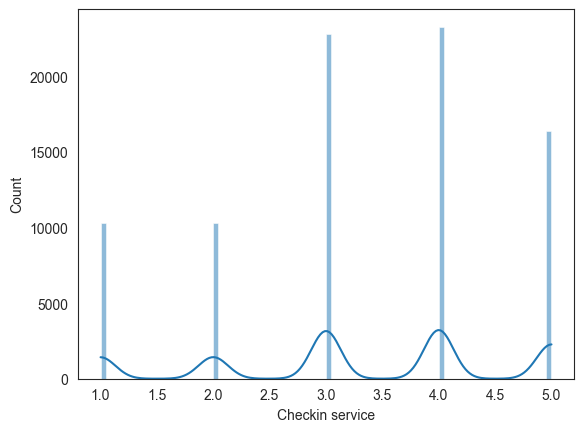

In [89]:
sns.histplot(X_train['Checkin service'], kde=True)

C:\Users\NohaA\AppData\Local\Temp\ipykernel_48224\226256233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data > ub_train] = ub_train
C:\Users\NohaA\AppData\Local\Temp\ipykernel_48224\226256233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data < lb_train] = lb_train
C:\Users\NohaA\AppData\Local\Temp\ipykernel_48224\226256233.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[test_data > ub_train] = ub

<Axes: ylabel='Checkin service'>

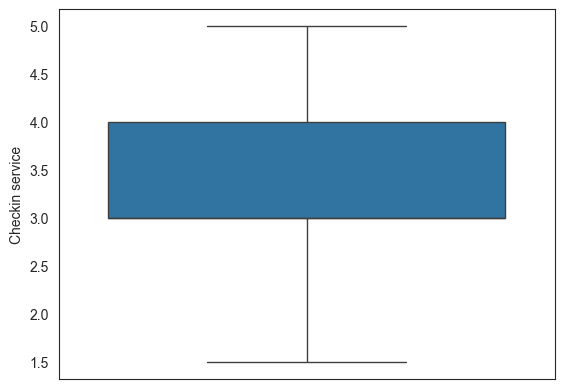

In [90]:
# Checkin service
def handle_train_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    ub_train = q3 + 1.5 * iqr
    lb_train = q1 - 1.5 * iqr
    data[data > ub_train] = ub_train
    data[data < lb_train] = lb_train
    return data, lb_train, ub_train

def handle_test_outliers(test_data, lb_train, ub_train):
    test_data[test_data > ub_train] = ub_train
    test_data[test_data < lb_train] = lb_train
    return test_data

X_train['Checkin service'], lb_train, ub_train = handle_train_outliers(X_train['Checkin service'])
X_test['Checkin service'] = handle_test_outliers(X_test['Checkin service'], lb_train, ub_train)
sns.boxplot(X_train['Checkin service'])

3.3653320982158967 3.0 4.0


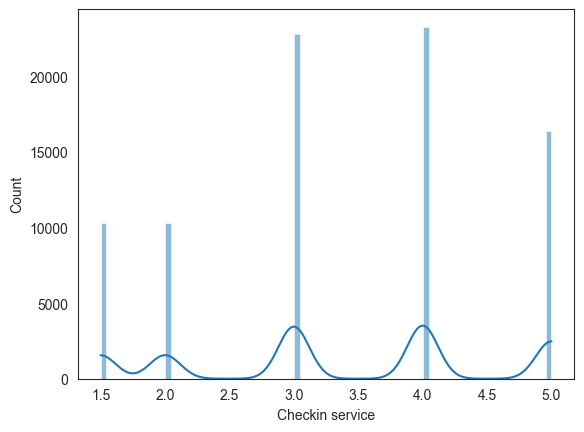

In [91]:
sns.histplot(X_train['Checkin service'], kde=True)
print(X_train['Checkin service'].mean(), X_train['Checkin service'].median(), X_train['Checkin service'].mode()[0])

<Axes: ylabel='Flight Distance'>

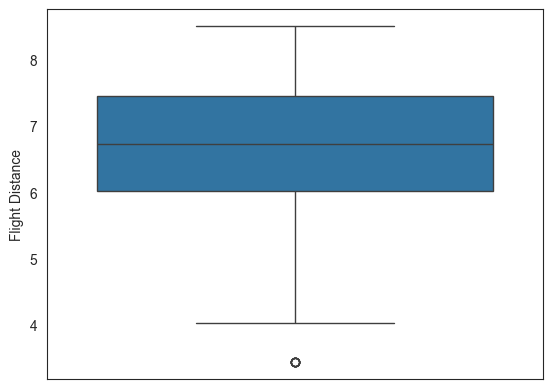

In [92]:
# log (Flight Distance)
loged_data = np.log(X_train['Flight Distance'])
sns.boxplot(loged_data)

1186.7552903528506 840.0 337


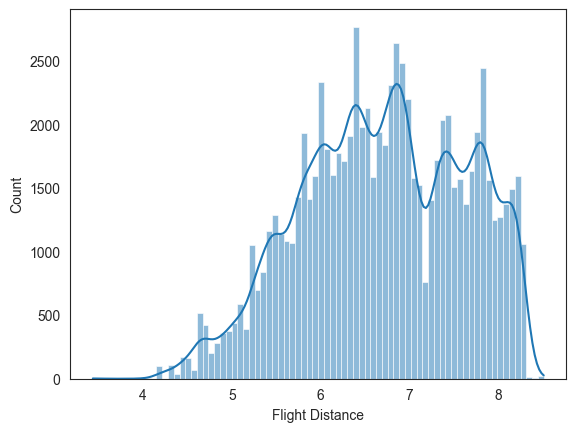

In [93]:
sns.histplot(loged_data, kde=True)
print(X_train['Flight Distance'].mean(), X_train['Flight Distance'].median(), X_train['Flight Distance'].mode()[0])

In [94]:
# handle outliers in fare
X_train['Flight Distance'] = np.log(X_train['Flight Distance']) # train_data
X_test['Flight Distance'] = np.log(X_test['Flight Distance']) # test_data

'Departure Delay in Minutes',
       'Arrival Delay in Minutes

<Axes: ylabel='Departure Delay in Minutes'>

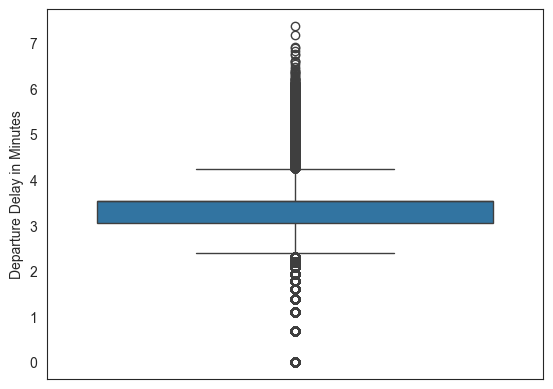

In [95]:
# Departure Delay in Minutes(log)
loged_data = np.log(X_train['Departure Delay in Minutes'])
sns.boxplot(loged_data)

34.18429128307208 34.18429128307208 34.18429128307208


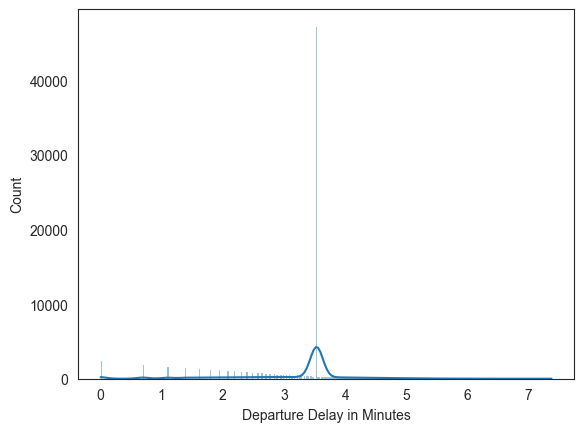

In [96]:
sns.histplot(loged_data, kde=True)
print(X_train['Departure Delay in Minutes'].mean(), X_train['Departure Delay in Minutes'].median(), X_train['Departure Delay in Minutes'].mode()[0])

In [97]:
# handle outliers in fare
X_train['Departure Delay in Minutes'] = np.log(X_train['Departure Delay in Minutes']) # train_data
X_test['Departure Delay in Minutes'] = np.log(X_test['Departure Delay in Minutes']) # test_data

,'Arrival Delay in Minutes'

<Axes: ylabel='Arrival Delay in Minutes'>

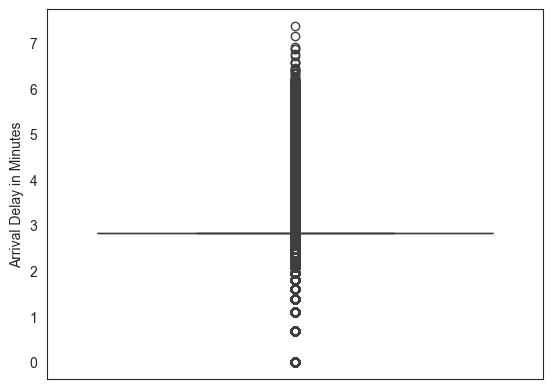

In [98]:
# Departure Delay in Minutes(log)
loged_data = np.log(X_train['Arrival Delay in Minutes'])
sns.boxplot(loged_data)

24.76197923559063 17.0 17.0


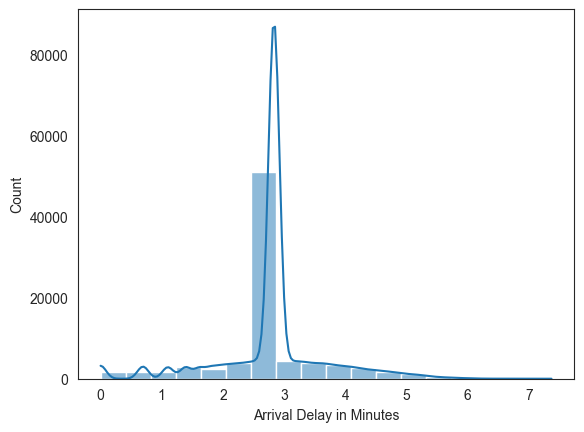

In [99]:
sns.histplot(loged_data, kde=True)
print(X_train['Arrival Delay in Minutes'].mean(), X_train['Arrival Delay in Minutes'].median(), X_train['Arrival Delay in Minutes'].mode()[0])

In [100]:
# handle outliers in fare
X_train['Arrival Delay in Minutes'] = np.log(X_train['Arrival Delay in Minutes']) # train_data
X_test['Arrival Delay in Minutes'] = np.log(X_test['Arrival Delay in Minutes']) # test_data

In [101]:
X_train

Gender      Customer Type  Age   Type of Travel     Class  \
30633  Female     Loyal Customer   47  Business travel  Business   
98857    Male  disloyal Customer   35  Business travel  Business   
80498  Female     Loyal Customer   66  Personal Travel       Eco   
73981    Male  disloyal Customer   26  Business travel       Eco   
70633    Male     Loyal Customer   48  Personal Travel       Eco   
...       ...                ...  ...              ...       ...   
63485    Male  disloyal Customer   36  Business travel  Business   
44955    Male     Loyal Customer   46  Business travel  Business   
53762    Male     Loyal Customer   55  Business travel  Business   
32633    Male  disloyal Customer   33  Business travel       Eco   
67623    Male  disloyal Customer   20  Business travel  Business   

       Flight Distance  Inflight wifi service  \
30633         7.327123               3.000000   
98857         7.857868               3.000000   
80498         6.309918               2.000000   
73981         7.145984               5.000000   
70633         6.603944               1.000000   
...                ...                    ...   
63485         5.908083               2.000000   
44955         6.159095               1.000000   
53762         4.905275               5.000000   
32633         7.368340               2.000000   
67623         7.059618               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  ...  Seat comfort  Inflight entertainment  \
30633            3.0  ...           5.0                     4.0   
98857            4.0  ...           5.0                     3.0   
80498            2.0  ...           5.0                     4.0   
73981            1.0  ...           3.0                     3.0   
70633            2.0  ...           4.0                     4.0   
...              ...  ...           ...                     ...   
63485            4.0  ...           3.0                     3.0   
44955            1.0  ...           4.0                     5.0   
53762            5.0  ...           4.0                     5.0   
32633            3.0  ...           5.0                     1.0   
67623            3.0  ...           1.0                     1.0   

       On-board service  Leg room service  Baggage handling  Checkin service  \
30633               4.0               4.0                 4              4.0   
98857               5.0               5.0                 5              5.0   
80498               4.0               2.0                 4              3.0   
73981               5.0               1.0                 5              3.0   
70633               5.0               2.0                 4              3.0   
...                 ...               ...               ...              ...   
63485               3.0               5.0                 5              5.0   
44955               5.0               5.0                 5              5.0   
53762               5.0               5.0                 5              5.0   
32633               4.0               4.0                 3              3.0   
67623               3.0               3.0                 4              3.0   

       Inflight se

***************************************

## e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])

In [102]:
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [103]:
X_train

Gender      Customer Type  Age   Type of Travel     Class  \
30633  Female     Loyal Customer   47  Business travel  Business   
98857    Male  disloyal Customer   35  Business travel  Business   
80498  Female     Loyal Customer   66  Personal Travel       Eco   
73981    Male  disloyal Customer   26  Business travel       Eco   
70633    Male     Loyal Customer   48  Personal Travel       Eco   
...       ...                ...  ...              ...       ...   
63485    Male  disloyal Customer   36  Business travel  Business   
44955    Male     Loyal Customer   46  Business travel  Business   
53762    Male     Loyal Customer   55  Business travel  Business   
32633    Male  disloyal Customer   33  Business travel       Eco   
67623    Male  disloyal Customer   20  Business travel  Business   

       Flight Distance  Inflight wifi service  \
30633         7.327123               3.000000   
98857         7.857868               3.000000   
80498         6.309918               2.000000   
73981         7.145984               5.000000   
70633         6.603944               1.000000   
...                ...                    ...   
63485         5.908083               2.000000   
44955         6.159095               1.000000   
53762         4.905275               5.000000   
32633         7.368340               2.000000   
67623         7.059618               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  ...  Seat comfort  Inflight entertainment  \
30633            3.0  ...           5.0                     4.0   
98857            4.0  ...           5.0                     3.0   
80498            2.0  ...           5.0                     4.0   
73981            1.0  ...           3.0                     3.0   
70633            2.0  ...           4.0                     4.0   
...              ...  ...           ...                     ...   
63485            4.0  ...           3.0                     3.0   
44955            1.0  ...           4.0                     5.0   
53762            5.0  ...           4.0                     5.0   
32633            3.0  ...           5.0                     1.0   
67623            3.0  ...           1.0                     1.0   

       On-board service  Leg room service  Baggage handling  Checkin service  \
30633               4.0               4.0                 4              4.0   
98857               5.0               5.0                 5              5.0   
80498               4.0               2.0                 4              3.0   
73981               5.0               1.0                 5              3.0   
70633               5.0               2.0                 4              3.0   
...                 ...               ...               ...              ...   
63485               3.0               5.0                 5              5.0   
44955               5.0               5.0                 5              5.0   
53762               5.0               5.0                 5              5.0   
32633               4.0               4.0                 3              3.0   
67623               3.0               3.0                 4              3.0   

       Inflight se

In [104]:
cat_cols = X_train.select_dtypes(include=["O", 'category']).columns
# cat_cols = X_train.select_dtypes(include=["category"]).columns
for col in cat_cols:
    print(f"number of uniques of \'{col}\': {X_train[col].nunique()}")
    print(f"uniques of \'{col}\': {X_train[col].unique()}")
    print()
    print("*" * 50)
    print()
    
# Gender and Customer Type are Nominal Columns
# Type of Travel and Class are Ordinal Columns

number of uniques of 'Gender': 2
uniques of 'Gender': ['Female' 'Male']

**************************************************

number of uniques of 'Customer Type': 2
uniques of 'Customer Type': ['Loyal Customer' 'disloyal Customer']

**************************************************

number of uniques of 'Type of Travel': 2
uniques of 'Type of Travel': ['Business travel' 'Personal Travel']

**************************************************

number of uniques of 'Class': 3
uniques of 'Class': ['Business' 'Eco' 'Eco Plus']

**************************************************



In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83123 entries, 30633 to 67623
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             83123 non-null  object 
 1   Customer Type                      83123 non-null  object 
 2   Age                                83123 non-null  int64  
 3   Type of Travel                     83123 non-null  object 
 4   Class                              83123 non-null  object 
 5   Flight Distance                    83123 non-null  float64
 6   Inflight wifi service              83123 non-null  float64
 7   Departure/Arrival time convenient  83123 non-null  float64
 8   Ease of Online booking             83123 non-null  float64
 9   Gate location                      83123 non-null  float64
 10  Food and drink                     83123 non-null  float64
 11  Online boarding                    83123 non-null  floa

In [106]:
# Convert float64 columns to float32 to save memory
float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].astype('float32')

# Convert int64 columns to int32 where possible
int_cols = df.select_dtypes(include=['int64']).columns
df[int_cols] = df[int_cols].astype('int32')

# Check and display the updated DataFrame info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int32  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int32  
 6   Inflight wifi service              100801 non-null  float32
 7   Departure/Arrival time convenient  98604 non-null   float32
 8   Ease of Online booking             99417 non-null   float32
 9   Gate location                      103903 non-null  float32
 10  Food and drink                     103797 non-null  float32
 11  Online boarding                    1014

In [107]:
# Ordinal (Type of Travel and Class are Ordinal Columns)
ordinal_encoder = OrdinalEncoder(categories=[['Eco',"Eco Plus",'Business']])
X_train[['Class']] = ordinal_encoder.fit_transform(X_train[['Class']])
X_test[['Class']] = ordinal_encoder.transform(X_test[['Class']])

In [108]:
ordinal_encoder.inverse_transform([[0]])

array([['Eco']], dtype=object)

In [109]:
ordinal_encoder.inverse_transform([[1]])

array([['Eco Plus']], dtype=object)

In [110]:
ordinal_encoder.inverse_transform([[2]])

array([['Business']], dtype=object)

In [111]:
X_train

Gender      Customer Type  Age   Type of Travel  Class  \
30633  Female     Loyal Customer   47  Business travel    2.0   
98857    Male  disloyal Customer   35  Business travel    2.0   
80498  Female     Loyal Customer   66  Personal Travel    0.0   
73981    Male  disloyal Customer   26  Business travel    0.0   
70633    Male     Loyal Customer   48  Personal Travel    0.0   
...       ...                ...  ...              ...    ...   
63485    Male  disloyal Customer   36  Business travel    2.0   
44955    Male     Loyal Customer   46  Business travel    2.0   
53762    Male     Loyal Customer   55  Business travel    2.0   
32633    Male  disloyal Customer   33  Business travel    0.0   
67623    Male  disloyal Customer   20  Business travel    2.0   

       Flight Distance  Inflight wifi service  \
30633         7.327123               3.000000   
98857         7.857868               3.000000   
80498         6.309918               2.000000   
73981         7.145984               5.000000   
70633         6.603944               1.000000   
...                ...                    ...   
63485         5.908083               2.000000   
44955         6.159095               1.000000   
53762         4.905275               5.000000   
32633         7.368340               2.000000   
67623         7.059618               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  ...  Seat comfort  Inflight entertainment  \
30633            3.0  ...           5.0                     4.0   
98857            4.0  ...           5.0                     3.0   
80498            2.0  ...           5.0                     4.0   
73981            1.0  ...           3.0                     3.0   
70633            2.0  ...           4.0                     4.0   
...              ...  ...           ...                     ...   
63485            4.0  ...           3.0                     3.0   
44955            1.0  ...           4.0                     5.0   
53762            5.0  ...           4.0                     5.0   
32633            3.0  ...           5.0                     1.0   
67623            3.0  ...           1.0                     1.0   

       On-board service  Leg room service  Baggage handling  Checkin service  \
30633               4.0               4.0                 4              4.0   
98857               5.0               5.0                 5              5.0   
80498               4.0               2.0                 4              3.0   
73981               5.0               1.0                 5              3.0   
70633               5.0               2.0                 4              3.0   
...                 ...               ...               ...              ...   
63485               3.0               5.0                 5              5.0   
44955               5.0               5.0                 5              5.0   
53762               5.0               5.0                 5              5.0   
32633               4.0               4.0                 3              3.0   
67623               3.0               3.0                 4              3.0   

       Inflight service  Cleanliness  Departure Delay 

In [112]:
X_test

Gender      Customer Type  Age   Type of Travel  Class  \
89374  Female  disloyal Customer   32  Business travel    2.0   
8211     Male     Loyal Customer   34  Business travel    2.0   
94614    Male  disloyal Customer   27  Business travel    2.0   
62313    Male     Loyal Customer   35  Business travel    2.0   
41609  Female     Loyal Customer   26  Personal Travel    0.0   
...       ...                ...  ...              ...    ...   
76803  Female     Loyal Customer   26  Personal Travel    0.0   
3408     Male     Loyal Customer   60  Business travel    2.0   
20516    Male     Loyal Customer   54  Business travel    2.0   
66410    Male     Loyal Customer   45  Personal Travel    0.0   
7996   Female     Loyal Customer   54  Business travel    2.0   

       Flight Distance  Inflight wifi service  \
89374         6.244167                    3.0   
8211          5.463832                    2.0   
94614         4.867534                    4.0   
62313         5.707110                    3.0   
41609         4.615121                    2.0   
...                ...                    ...   
76803         7.278629                    2.0   
3408          5.393628                    1.0   
20516         7.420579                    4.0   
66410         6.190315                    2.0   
7996          7.383368                    4.0   

       Departure/Arrival time convenient  Ease of Online booking  \
89374                                3.0                     3.0   
8211                                 1.0                     1.0   
94614                                4.0                     4.0   
62313                                3.0                     3.0   
41609                                5.0                     2.0   
...                                  ...                     ...   
76803                                5.0                     2.0   
3408                                 1.0                     1.0   
20516                                4.0                     4.0   
66410                                5.0                     5.0   
7996                                 4.0                     4.0   

       Gate location  ...  Seat comfort  Inflight entertainment  \
89374            4.0  ...           2.0                     2.0   
8211             1.0  ...           3.0                     2.0   
94614            1.0  ...           3.0                     3.0   
62313            3.0  ...           3.0                     3.0   
41609            3.0  ...           3.0                     3.0   
...              ...  ...           ...                     ...   
76803            4.0  ...           1.0                     1.0   
3408             1.0  ...           5.0                     5.0   
20516            4.0  ...           5.0                     4.0   
66410            4.0  ...           5.0                     5.0   
7996             4.0  ...           4.0                     5.0   

       On-board service  Leg room service  Baggage handling  Checkin service  \
89374               4.0               4.0                 5              5.0   
8211                2.0               2.0                 2              2.0   
94614               5.0               2.0                 4              3.0   
62313               3.0               3.0                 3              2.0   
41609               3.0               3.0                 4              5.0   
...                 ...               ...               ...              ...   
76803               5.0               5.0                 2              1.5   
3408                5.0               5.0                 5              4.0   
20516               4.0               4.0                 4              3.0   
66410               3.0               4.0                 5              5.0   
7996                5.0               5.0                 5              3.0   

       Inflight service  Cleanliness  Departure Delay 

In [113]:
## Nominal Columns: Gender
ohe_encoder = OneHotEncoder(sparse_output=False, drop='first')
nominal_df = ohe_encoder.fit_transform(X_train[['Gender']])
nominal_df = pd.DataFrame(nominal_df, columns=ohe_encoder.get_feature_names_out(), index=X_train.index)
nominal_df
# 0 female & 1 is male

Gender_Male
30633          0.0
98857          1.0
80498          0.0
73981          1.0
70633          1.0
...            ...
63485          1.0
44955          1.0
53762          1.0
32633          1.0
67623          1.0

[83123 rows x 1 columns]

In [114]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

    # Separate nominal and ordinal columns as per your criteria
nominal_cols = []  # Replace with your nominal columns
ordinal_cols = []  # Replace with your ordinal columns

# Encoding function
def encode_features(df, nominal_cols, ordinal_cols):
    # Ordinal Encoding
    for col in ordinal_cols:
        if df[col].nunique() <= 2:  # For binary ordinal features
            encoder = LabelEncoder()
            df[col] = encoder.fit_transform(df[col])
        else:
            encoder = OrdinalEncoder()
            df[col] = encoder.fit_transform(df[[col]])

    # Nominal Encoding
    for col in nominal_cols:
        if df[col].nunique() < 7:
            #OneHotEncode nominal columns with <7 unique values
            encoder = OneHotEncoder(sparse=False, drop='first')
            encoded = pd.DataFrame(encoder.fit_transform(df[[col]]), columns=encoder.get_feature_names_out([col]))
            df = pd.concat([df.drop(columns=[col]), encoded], axis=1)
        else:
            # Binary Encoding for nominal columns with >=7 unique values
            encoder = BinaryEncoder()
            df = pd.concat([df.drop(columns=[col]), encoder.fit_transform(df[col])], axis=1)
    
    return df

In [115]:
X_train

Gender      Customer Type  Age   Type of Travel  Class  \
30633  Female     Loyal Customer   47  Business travel    2.0   
98857    Male  disloyal Customer   35  Business travel    2.0   
80498  Female     Loyal Customer   66  Personal Travel    0.0   
73981    Male  disloyal Customer   26  Business travel    0.0   
70633    Male     Loyal Customer   48  Personal Travel    0.0   
...       ...                ...  ...              ...    ...   
63485    Male  disloyal Customer   36  Business travel    2.0   
44955    Male     Loyal Customer   46  Business travel    2.0   
53762    Male     Loyal Customer   55  Business travel    2.0   
32633    Male  disloyal Customer   33  Business travel    0.0   
67623    Male  disloyal Customer   20  Business travel    2.0   

       Flight Distance  Inflight wifi service  \
30633         7.327123               3.000000   
98857         7.857868               3.000000   
80498         6.309918               2.000000   
73981         7.145984               5.000000   
70633         6.603944               1.000000   
...                ...                    ...   
63485         5.908083               2.000000   
44955         6.159095               1.000000   
53762         4.905275               5.000000   
32633         7.368340               2.000000   
67623         7.059618               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  ...  Seat comfort  Inflight entertainment  \
30633            3.0  ...           5.0                     4.0   
98857            4.0  ...           5.0                     3.0   
80498            2.0  ...           5.0                     4.0   
73981            1.0  ...           3.0                     3.0   
70633            2.0  ...           4.0                     4.0   
...              ...  ...           ...                     ...   
63485            4.0  ...           3.0                     3.0   
44955            1.0  ...           4.0                     5.0   
53762            5.0  ...           4.0                     5.0   
32633            3.0  ...           5.0                     1.0   
67623            3.0  ...           1.0                     1.0   

       On-board service  Leg room service  Baggage handling  Checkin service  \
30633               4.0               4.0                 4              4.0   
98857               5.0               5.0                 5              5.0   
80498               4.0               2.0                 4              3.0   
73981               5.0               1.0                 5              3.0   
70633               5.0               2.0                 4              3.0   
...                 ...               ...               ...              ...   
63485               3.0               5.0                 5              5.0   
44955               5.0               5.0                 5              5.0   
53762               5.0               5.0                 5              5.0   
32633               4.0               4.0                 3              3.0   
67623               3.0               3.0                 4              3.0   

       Inflight service  Cleanliness  Departure Delay 

In [116]:
X_train = pd.concat([X_train, nominal_df], axis=1)
X_train

Gender      Customer Type  Age   Type of Travel  Class  \
30633  Female     Loyal Customer   47  Business travel    2.0   
98857    Male  disloyal Customer   35  Business travel    2.0   
80498  Female     Loyal Customer   66  Personal Travel    0.0   
73981    Male  disloyal Customer   26  Business travel    0.0   
70633    Male     Loyal Customer   48  Personal Travel    0.0   
...       ...                ...  ...              ...    ...   
63485    Male  disloyal Customer   36  Business travel    2.0   
44955    Male     Loyal Customer   46  Business travel    2.0   
53762    Male     Loyal Customer   55  Business travel    2.0   
32633    Male  disloyal Customer   33  Business travel    0.0   
67623    Male  disloyal Customer   20  Business travel    2.0   

       Flight Distance  Inflight wifi service  \
30633         7.327123               3.000000   
98857         7.857868               3.000000   
80498         6.309918               2.000000   
73981         7.145984               5.000000   
70633         6.603944               1.000000   
...                ...                    ...   
63485         5.908083               2.000000   
44955         6.159095               1.000000   
53762         4.905275               5.000000   
32633         7.368340               2.000000   
67623         7.059618               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  ...  Inflight entertainment  On-board service  \
30633            3.0  ...                     4.0               4.0   
98857            4.0  ...                     3.0               5.0   
80498            2.0  ...                     4.0               4.0   
73981            1.0  ...                     3.0               5.0   
70633            2.0  ...                     4.0               5.0   
...              ...  ...                     ...               ...   
63485            4.0  ...                     3.0               3.0   
44955            1.0  ...                     5.0               5.0   
53762            5.0  ...                     5.0               5.0   
32633            3.0  ...                     1.0               4.0   
67623            3.0  ...                     1.0               3.0   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
30633               4.0                 4              4.0               4.0   
98857               5.0                 5              5.0               4.0   
80498               2.0                 4              3.0               4.0   
73981               1.0                 5              3.0               4.0   
70633               2.0                 4              3.0               5.0   
...                 ...               ...              ...               ...   
63485               5.0                 5              5.0               5.0   
44955               5.0                 5              5.0               5.0   
53762               5.0                 5              5.0               5.0   
32633               4.0                 3              3.0               3.0   
67623               3.0                 4              3.0               5.0   

      

In [117]:
print(X_train.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male'],
      dtype='object')


In [118]:
X_train.drop(['Type of Travel'], axis=1, inplace=True)
X_train

Gender      Customer Type  Age  Class  Flight Distance  \
30633  Female     Loyal Customer   47    2.0         7.327123   
98857    Male  disloyal Customer   35    2.0         7.857868   
80498  Female     Loyal Customer   66    0.0         6.309918   
73981    Male  disloyal Customer   26    0.0         7.145984   
70633    Male     Loyal Customer   48    0.0         6.603944   
...       ...                ...  ...    ...              ...   
63485    Male  disloyal Customer   36    2.0         5.908083   
44955    Male     Loyal Customer   46    2.0         6.159095   
53762    Male     Loyal Customer   55    2.0         4.905275   
32633    Male  disloyal Customer   33    0.0         7.368340   
67623    Male  disloyal Customer   20    2.0         7.059618   

       Inflight wifi service  Departure/Arrival time convenient  \
30633               3.000000                                3.0   
98857               3.000000                                3.0   
80498               2.000000                                4.0   
73981               5.000000                                4.0   
70633               1.000000                                5.0   
...                      ...                                ...   
63485               2.000000                                2.0   
44955               1.000000                                1.0   
53762               5.000000                                5.0   
32633               2.000000                                2.0   
67623               2.814508                                1.0   

       Ease of Online booking  Gate location  Food and drink  ...  \
30633                3.000000            3.0             5.0  ...   
98857                3.000000            4.0             3.0  ...   
80498                2.000000            2.0             5.0  ...   
73981                4.000000            1.0             3.0  ...   
70633                2.881537            2.0             4.0  ...   
...                       ...            ...             ...  ...   
63485                2.000000            4.0             3.0  ...   
44955                1.000000            1.0             5.0  ...   
53762                5.000000            5.0             2.0  ...   
32633                2.000000            3.0             1.0  ...   
67623                2.881537            3.0             1.0  ...   

       Inflight entertainment  On-board service  Leg room service  \
30633                     4.0               4.0               4.0   
98857                     3.0               5.0               5.0   
80498                     4.0               4.0               2.0   
73981                     3.0               5.0               1.0   
70633                     4.0               5.0               2.0   
...                       ...               ...               ...   
63485                     3.0               3.0               5.0   
44955                     5.0               5.0               5.0   
53762                     5.0               5.0               5.0   
32633                     1.0               4.0               4.0   
67623                     1.0               3.0               3.0   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
30633                 4              4.0               4.0          3.0   
98857                 5              5.0               4.0          3.0   
80498                 4              3.0               4.0          5.0   
73981                 5              3.0               4.0          3.0   
70633                 4              3.0               5.0          4.0   
...                 ...              ...               ...          ...   
63485                 5              5.0               5.0          3.0   
44955                 5              5.0               5.0          3.0   
53762                 5              5.0               5.0          5.0   
32633        

In [119]:
X_train.drop(['Gender'], axis=1, inplace=True)
X_train

Customer Type  Age  Class  Flight Distance  Inflight wifi service  \
30633     Loyal Customer   47    2.0         7.327123               3.000000   
98857  disloyal Customer   35    2.0         7.857868               3.000000   
80498     Loyal Customer   66    0.0         6.309918               2.000000   
73981  disloyal Customer   26    0.0         7.145984               5.000000   
70633     Loyal Customer   48    0.0         6.603944               1.000000   
...                  ...  ...    ...              ...                    ...   
63485  disloyal Customer   36    2.0         5.908083               2.000000   
44955     Loyal Customer   46    2.0         6.159095               1.000000   
53762     Loyal Customer   55    2.0         4.905275               5.000000   
32633  disloyal Customer   33    0.0         7.368340               2.000000   
67623  disloyal Customer   20    2.0         7.059618               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  Food and drink  Online boarding  ...  \
30633            3.0             5.0         4.000000  ...   
98857            4.0             3.0         3.000000  ...   
80498            2.0             5.0         4.000000  ...   
73981            1.0             3.0         5.000000  ...   
70633            2.0             4.0         3.327404  ...   
...              ...             ...              ...  ...   
63485            4.0             3.0         2.000000  ...   
44955            1.0             5.0         4.000000  ...   
53762            5.0             2.0         5.000000  ...   
32633            3.0             1.0         2.000000  ...   
67623            3.0             1.0         3.327404  ...   

       Inflight entertainment  On-board service  Leg room service  \
30633                     4.0               4.0               4.0   
98857                     3.0               5.0               5.0   
80498                     4.0               4.0               2.0   
73981                     3.0               5.0               1.0   
70633                     4.0               5.0               2.0   
...                       ...               ...               ...   
63485                     3.0               3.0               5.0   
44955                     5.0               5.0               5.0   
53762                     5.0               5.0               5.0   
32633                     1.0               4.0               4.0   
67623                     1.0               3.0               3.0   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
30633                 4              4.0               4.0          3.0   
98857                 5              5.0               4.0          3.0   
80498                 4              3.0               4.0          5.0   
73981                 5              3.0               4.0          3.0   
70633                 4              3.0               5.0          4.0   
...                 ...              ...               ...          ...   
63485                 5              5.0               5.0          3.0   
44955                 5              5.0               5.0 

In [120]:
# deck (BinaryEncoder)
bin_encoder = BinaryEncoder()
bin_encoder

BinaryEncoder()

In [121]:
print(X_train.columns)

Index(['Customer Type', 'Age', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male'],
      dtype='object')


In [122]:
bin_encoder = BinaryEncoder()
nominal_df_2 = bin_encoder.fit_transform(X_train[['Arrival Delay in Minutes']]) # fit_transform on train 
X_train = pd.concat([X_train, nominal_df_2], axis=1)
X_train.drop('Arrival Delay in Minutes', axis=1, inplace=True)
nominal_df_test_2 = bin_encoder.transform(X_test[['Arrival Delay in Minutes']]) # then transform on test 
X_test = pd.concat([X_test, nominal_df_test_2], axis=1)
X_test.drop('Arrival Delay in Minutes', axis=1, inplace=True) 
X_train

Customer Type  Age  Class  Flight Distance  Inflight wifi service  \
30633     Loyal Customer   47    2.0         7.327123               3.000000   
98857  disloyal Customer   35    2.0         7.857868               3.000000   
80498     Loyal Customer   66    0.0         6.309918               2.000000   
73981  disloyal Customer   26    0.0         7.145984               5.000000   
70633     Loyal Customer   48    0.0         6.603944               1.000000   
...                  ...  ...    ...              ...                    ...   
63485  disloyal Customer   36    2.0         5.908083               2.000000   
44955     Loyal Customer   46    2.0         6.159095               1.000000   
53762     Loyal Customer   55    2.0         4.905275               5.000000   
32633  disloyal Customer   33    0.0         7.368340               2.000000   
67623  disloyal Customer   20    2.0         7.059618               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  Food and drink  Online boarding  Seat comfort  \
30633            3.0             5.0         4.000000           5.0   
98857            4.0             3.0         3.000000           5.0   
80498            2.0             5.0         4.000000           5.0   
73981            1.0             3.0         5.000000           3.0   
70633            2.0             4.0         3.327404           4.0   
...              ...             ...              ...           ...   
63485            4.0             3.0         2.000000           3.0   
44955            1.0             5.0         4.000000           4.0   
53762            5.0             2.0         5.000000           4.0   
32633            3.0             1.0         2.000000           5.0   
67623            3.0             1.0         3.327404           1.0   

       Inflight entertainment  On-board service  Leg room service  \
30633                     4.0               4.0               4.0   
98857                     3.0               5.0               5.0   
80498                     4.0               4.0               2.0   
73981                     3.0               5.0               1.0   
70633                     4.0               5.0               2.0   
...                       ...               ...               ...   
63485                     3.0               3.0               5.0   
44955                     5.0               5.0               5.0   
53762                     5.0               5.0               5.0   
32633                     1.0               4.0               4.0   
67623                     1.0               3.0               3.0   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
30633                 4              4.0               4.0          3.0   
98857                 5              5.0               4.0          3.0   
80498                 4              3.0               4.0          5.0   
73981                 5              3.0               4.0          3.0   
70633                 4              3.0               5.0          4.0   
...                 ...              ...               ...          ...   
63485                 5   

In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83123 entries, 30633 to 67623
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer Type                      83123 non-null  object 
 1   Age                                83123 non-null  int64  
 2   Class                              83123 non-null  float64
 3   Flight Distance                    83123 non-null  float64
 4   Inflight wifi service              83123 non-null  float64
 5   Departure/Arrival time convenient  83123 non-null  float64
 6   Ease of Online booking             83123 non-null  float64
 7   Gate location                      83123 non-null  float64
 8   Food and drink                     83123 non-null  float64
 9   Online boarding                    83123 non-null  float64
 10  Seat comfort                       83123 non-null  float64
 11  Inflight entertainment             83123 non-null  floa

In [124]:
X_train.isna().sum()

Customer Type                        0
Age                                  0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Gender_Male                          0
dtype: int64

******************

## f) Imbalanced: X_train_resampled

In [125]:
y_train.value_counts()
# learn featuer better than another feature

satisfaction
neutral or dissatisfied    47103
satisfied                  36020
Name: count, dtype: int64

In [126]:
# make underample 
# neutral or dissatisfied is majority class
# satisfied unmajority class

In [127]:
sum(X_train.duplicated() == True), X_train.duplicated().sum()

(0, np.int64(0))

In [128]:
train_duplicates_drop = X_train[X_train.duplicated() == True].index
X_train.drop(train_duplicates_drop, axis=0, inplace=True)
y_train.drop(train_duplicates_drop, axis=0, inplace=True)

test_duplicates_drop = X_test[X_test.duplicated() == True].index
X_test.drop(test_duplicates_drop, axis=0, inplace=True)
y_test.drop(test_duplicates_drop, axis=0, inplace=True)

In [129]:
y_train.value_counts()

satisfaction
neutral or dissatisfied    47103
satisfied                  36020
Name: count, dtype: int64

In [130]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rndom_sampler = RandomUnderSampler(random_state=42) # replacement=False (will not duplicate rows otherwise will pick randomly and duplicate) by default True
# sampling_strategy={0:200, 1:200} each class have how many values
rndom_sampler

RandomUnderSampler(random_state=42)

In [131]:
X_train_resampled, y_train_resampled = rndom_sampler.fit_resample(X=X_train, y=y_train) # Train Data Only
X_train_resampled

Customer Type  Age  Class  Flight Distance  Inflight wifi service  \
23877  disloyal Customer   45    1.0         6.675823               3.000000   
49974     Loyal Customer   67    0.0         6.612041               3.000000   
39860     Loyal Customer   41    0.0         5.730100               4.000000   
57125     Loyal Customer   58    0.0         6.726233               3.000000   
12662     Loyal Customer   37    2.0         8.074960               1.000000   
...                  ...  ...    ...              ...                    ...   
72617     Loyal Customer   48    2.0         6.001415               2.000000   
16969     Loyal Customer   40    2.0         7.813996               3.000000   
44955     Loyal Customer   46    2.0         6.159095               1.000000   
53762     Loyal Customer   55    2.0         4.905275               5.000000   
67623  disloyal Customer   20    2.0         7.059618               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
23877                                3.0                3.000000   
49974                                5.0                4.000000   
39860                                5.0                4.000000   
57125                                5.0                3.000000   
12662                                4.0                4.000000   
...                                  ...                     ...   
72617                                2.0                2.000000   
16969                                3.0                3.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
67623                                1.0                2.881537   

       Gate location  Food and drink  Online boarding  Seat comfort  \
23877            2.0             5.0         3.000000           5.0   
49974            4.0             2.0         4.000000           2.0   
39860            3.0             3.0         4.000000           3.0   
57125            3.0             2.0         3.000000           2.0   
12662            4.0             1.0         4.000000           3.0   
...              ...             ...              ...           ...   
72617            2.0             4.0         5.000000           5.0   
16969            3.0             4.0         5.000000           5.0   
44955            1.0             5.0         4.000000           4.0   
53762            5.0             2.0         5.000000           4.0   
67623            3.0             1.0         3.327404           1.0   

       Inflight entertainment  On-board service  Leg room service  \
23877                     5.0               4.0               2.0   
49974                     2.0               4.0               3.0   
39860                     3.0               3.0               3.0   
57125                     2.0               5.0               5.0   
12662                     1.0               1.0               1.0   
...                       ...               ...               ...   
72617                     5.0               5.0               5.0   
16969                     3.0               4.0               4.0   
44955                     5.0               5.0               5.0   
53762                     5.0               5.0               5.0   
67623                     1.0               3.0               3.0   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
23877                 1              4.0               1.0          5.0   
49974                 5              4.0               5.0          2.0   
39860                 5              5.0               5.0          3.0   
57125                 5              4.0               4.0          2.0   
12662                 1              3.0               1.0          2.0   
...                 ...              ...               ...          ...   
72617                 4   

In [132]:
X_train_resampled.duplicated().sum()

np.int64(0)

In [133]:
y_train_resampled.value_counts()

satisfaction
neutral or dissatisfied    36020
satisfied                  36020
Name: count, dtype: int64

In [134]:
y_train.value_counts()

satisfaction
neutral or dissatisfied    47103
satisfied                  36020
Name: count, dtype: int64

In [135]:
random_over_sampler = RandomOverSampler(random_state=42) # shrinkage = 0 (default)
X_train_resampled_over, y_train_resampled_over = random_over_sampler.fit_resample(X=X_train, y=y_train) # Train Data Only
X_train_resampled_over

Customer Type  Age  Class  Flight Distance  Inflight wifi service  \
0         Loyal Customer   47    2.0         7.327123               3.000000   
1      disloyal Customer   35    2.0         7.857868               3.000000   
2         Loyal Customer   66    0.0         6.309918               2.000000   
3      disloyal Customer   26    0.0         7.145984               5.000000   
4         Loyal Customer   48    0.0         6.603944               1.000000   
...                  ...  ...    ...              ...                    ...   
94201     Loyal Customer   41    2.0         7.921898               5.000000   
94202     Loyal Customer   43    2.0         8.280458               3.000000   
94203     Loyal Customer   59    2.0         7.717796               2.000000   
94204     Loyal Customer   47    2.0         5.283204               2.814508   
94205     Loyal Customer   31    2.0         8.142645               2.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                    3.0                3.000000   
1                                    3.0                3.000000   
2                                    4.0                2.000000   
3                                    4.0                4.000000   
4                                    5.0                2.881537   
...                                  ...                     ...   
94201                                5.0                5.000000   
94202                                3.0                3.000000   
94203                                2.0                2.000000   
94204                                4.0                2.881537   
94205                                2.0                2.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0                3.0             5.0         4.000000           5.0   
1                4.0             3.0         3.000000           5.0   
2                2.0             5.0         4.000000           5.0   
3                1.0             3.0         5.000000           3.0   
4                2.0             4.0         3.327404           4.0   
...              ...             ...              ...           ...   
94201            5.0             2.0         5.000000           4.0   
94202            3.0             3.0         5.000000           5.0   
94203            2.0             2.0         4.000000           4.0   
94204            3.0             4.0         4.000000           4.0   
94205            2.0             4.0         4.000000           4.0   

       Inflight entertainment  On-board service  Leg room service  \
0                         4.0               4.0               4.0   
1                         3.0               5.0               5.0   
2                         4.0               4.0               2.0   
3                         3.0               5.0               1.0   
4                         4.0               5.0               2.0   
...                       ...               ...               ...   
94201                     4.0               4.0               4.0   
94202                     4.0               4.0               4.0   
94203                     4.0               4.0               4.0   
94204                     5.0               5.0               5.0   
94205                     4.0               5.0               3.0   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                     4              4.0               4.0          3.0   
1                     5              5.0               4.0          3.0   
2                     4              3.0               4.0          5.0   
3                     5              3.0               4.0          3.0   
4                     4              3.0               5.0          4.0   
...                 ...              ...               ...          ...   
94201                 4   

In [136]:
y_train_resampled_over.value_counts()

satisfaction
satisfied                  47103
neutral or dissatisfied    47103
Name: count, dtype: int64

In [137]:
X_train_resampled_over.duplicated().sum()

np.int64(11083)

In [138]:
y_train.value_counts()

satisfaction
neutral or dissatisfied    47103
satisfied                  36020
Name: count, dtype: int64

In [139]:
from imblearn.over_sampling import SMOTE


In [140]:
smote = SMOTE(k_neighbors=2, random_state=42)
smote

SMOTE(k_neighbors=2, random_state=42)

In [141]:
pd.get_dummies(X_train)

Age  Class  Flight Distance  Inflight wifi service  \
30633   47    2.0         7.327123               3.000000   
98857   35    2.0         7.857868               3.000000   
80498   66    0.0         6.309918               2.000000   
73981   26    0.0         7.145984               5.000000   
70633   48    0.0         6.603944               1.000000   
...    ...    ...              ...                    ...   
63485   36    2.0         5.908083               2.000000   
44955   46    2.0         6.159095               1.000000   
53762   55    2.0         4.905275               5.000000   
32633   33    0.0         7.368340               2.000000   
67623   20    2.0         7.059618               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  Food and drink  Online boarding  Seat comfort  ...  \
30633            3.0             5.0         4.000000           5.0  ...   
98857            4.0             3.0         3.000000           5.0  ...   
80498            2.0             5.0         4.000000           5.0  ...   
73981            1.0             3.0         5.000000           3.0  ...   
70633            2.0             4.0         3.327404           4.0  ...   
...              ...             ...              ...           ...  ...   
63485            4.0             3.0         2.000000           3.0  ...   
44955            1.0             5.0         4.000000           4.0  ...   
53762            5.0             2.0         5.000000           4.0  ...   
32633            3.0             1.0         2.000000           5.0  ...   
67623            3.0             1.0         3.327404           1.0  ...   

       On-board service  Leg room service  Baggage handling  Checkin service  \
30633               4.0               4.0                 4              4.0   
98857               5.0               5.0                 5              5.0   
80498               4.0               2.0                 4              3.0   
73981               5.0               1.0                 5              3.0   
70633               5.0               2.0                 4              3.0   
...                 ...               ...               ...              ...   
63485               3.0               5.0                 5              5.0   
44955               5.0               5.0                 5              5.0   
53762               5.0               5.0                 5              5.0   
32633               4.0               4.0                 3              3.0   
67623               3.0               3.0                 4              3.0   

       Inflight service  Cleanliness  Departure Delay in Minutes  Gender_Male  \
30633               4.0          3.0                    3.531766          0.0   
98857               4.0          3.0                    3.531766          1.0   
80498               4.0          5.0                    4.356709          0.0   
73981               4.0          3.0                    3.531766          1.0   
70633               5.0          4.0                    4.158883          1.0   
...                 ...          ...                         ...          ...   
63485           

In [142]:
X_train

Customer Type  Age  Class  Flight Distance  Inflight wifi service  \
30633     Loyal Customer   47    2.0         7.327123               3.000000   
98857  disloyal Customer   35    2.0         7.857868               3.000000   
80498     Loyal Customer   66    0.0         6.309918               2.000000   
73981  disloyal Customer   26    0.0         7.145984               5.000000   
70633     Loyal Customer   48    0.0         6.603944               1.000000   
...                  ...  ...    ...              ...                    ...   
63485  disloyal Customer   36    2.0         5.908083               2.000000   
44955     Loyal Customer   46    2.0         6.159095               1.000000   
53762     Loyal Customer   55    2.0         4.905275               5.000000   
32633  disloyal Customer   33    0.0         7.368340               2.000000   
67623  disloyal Customer   20    2.0         7.059618               2.814508   

       Departure/Arrival time convenient  Ease of Online booking  \
30633                                3.0                3.000000   
98857                                3.0                3.000000   
80498                                4.0                2.000000   
73981                                4.0                4.000000   
70633                                5.0                2.881537   
...                                  ...                     ...   
63485                                2.0                2.000000   
44955                                1.0                1.000000   
53762                                5.0                5.000000   
32633                                2.0                2.000000   
67623                                1.0                2.881537   

       Gate location  Food and drink  Online boarding  Seat comfort  \
30633            3.0             5.0         4.000000           5.0   
98857            4.0             3.0         3.000000           5.0   
80498            2.0             5.0         4.000000           5.0   
73981            1.0             3.0         5.000000           3.0   
70633            2.0             4.0         3.327404           4.0   
...              ...             ...              ...           ...   
63485            4.0             3.0         2.000000           3.0   
44955            1.0             5.0         4.000000           4.0   
53762            5.0             2.0         5.000000           4.0   
32633            3.0             1.0         2.000000           5.0   
67623            3.0             1.0         3.327404           1.0   

       Inflight entertainment  On-board service  Leg room service  \
30633                     4.0               4.0               4.0   
98857                     3.0               5.0               5.0   
80498                     4.0               4.0               2.0   
73981                     3.0               5.0               1.0   
70633                     4.0               5.0               2.0   
...                       ...               ...               ...   
63485                     3.0               3.0               5.0   
44955                     5.0               5.0               5.0   
53762                     5.0               5.0               5.0   
32633                     1.0               4.0               4.0   
67623                     1.0               3.0               3.0   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
30633                 4              4.0               4.0          3.0   
98857                 5              5.0               4.0          3.0   
80498                 4              3.0               4.0          5.0   
73981                 5              3.0               4.0          3.0   
70633                 4              3.0               5.0          4.0   
...                 ...              ...               ...          ...   
63485                 5   

In [143]:
LabelEncoder 

sklearn.preprocessing._label.LabelEncoder

In [144]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Convert categorical columns to numeric using pd.get_dummies or LabelEncoder
X_train = pd.get_dummies(X_train, drop_first=True)  # one-hot encoding

# Convert target variable (if categorical) using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Apply SMOTE
smote = SMOTE()
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)


In [145]:
X_train_resampled_smote, y_train_resampled_smote =  smote.fit_resample(X_train, y_train)
X_train_resampled_smote

Age  Class  Flight Distance  Inflight wifi service  \
0       47    2.0         7.327123               3.000000   
1       35    2.0         7.857868               3.000000   
2       66    0.0         6.309918               2.000000   
3       26    0.0         7.145984               5.000000   
4       48    0.0         6.603944               1.000000   
...    ...    ...              ...                    ...   
94201   39    2.0         6.693516               3.000000   
94202   40    2.0         5.475906               2.814508   
94203   52    2.0         8.059039               1.000000   
94204   56    0.0         5.382801               4.971732   
94205   28    2.0         6.511900               4.965281   

       Departure/Arrival time convenient  Ease of Online booking  \
0                               3.000000                3.000000   
1                               3.000000                3.000000   
2                               4.000000                2.000000   
3                               4.000000                4.000000   
4                               5.000000                2.881537   
...                                  ...                     ...   
94201                           2.991944                3.000000   
94202                           3.226756                2.881537   
94203                           1.000000                1.000000   
94204                           4.971732                4.971732   
94205                           4.965281                4.965281   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0           3.000000        5.000000         4.000000      5.000000   
1           4.000000        3.000000         3.000000      5.000000   
2           2.000000        5.000000         4.000000      5.000000   
3           1.000000        3.000000         5.000000      3.000000   
4           2.000000        4.000000         3.327404      4.000000   
...              ...             ...              ...           ...   
94201       3.000000        4.008056         4.000000      3.991944   
94202       1.000000        5.000000         4.734968      4.000000   
94203       1.000000        3.067188         5.000000      4.932812   
94204       3.028268        5.000000         4.971732      5.000000   
94205       4.965281        1.034719         2.000000      1.034719   

       Inflight entertainment  On-board service  Leg room service  \
0                    4.000000               4.0          4.000000   
1                    3.000000               5.0          5.000000   
2                    4.000000               4.0          2.000000   
3                    3.000000               5.0          1.000000   
4                    4.000000               5.0          2.000000   
...                       ...               ...               ...   
94201                5.000000               5.0          5.000000   
94202                1.000000               1.0          1.000000   
94203                5.000000               5.0          5.000000   
94204                5.000000               2.0          1.028268   
94205                1.034719               4.0          1.034719   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                     4         4.000000               4.0     3.000000   
1                     5         5.000000               4.0     3.000000   
2                     4         3.000000               4.0     5.000000   
3                     5         3.000000               4.0     3.000000   
4                     4         3.000000               5.0     4.000000   
...                 ...              ...               ...          ...   
94201                 5         2.991944               5.0     4.991944   
94202                 1         5.000000               1.0     4.000000   
94203                 5         5.000000               5.0     4.000000   
94204                 1  

In [146]:
return_counts=True

In [147]:
import pandas as pd

# Convert to pandas Series and use value_counts()
pd.Series(y_train_resampled_smote).value_counts()


1    47103
0    47103
Name: count, dtype: int64

In [148]:
import numpy as np

# Use np.unique to get unique values and their counts
unique, counts = np.unique(y_train_resampled_smote, return_counts=True)
dict(zip(unique, counts))


{np.int64(0): np.int64(47103), np.int64(1): np.int64(47103)}

In [149]:
#y_train_resampled_smote.value_counts()

In [150]:
X_train_resampled_smote.duplicated().sum()

np.int64(0)

In [151]:
X_train_resampled_smote

Age  Class  Flight Distance  Inflight wifi service  \
0       47    2.0         7.327123               3.000000   
1       35    2.0         7.857868               3.000000   
2       66    0.0         6.309918               2.000000   
3       26    0.0         7.145984               5.000000   
4       48    0.0         6.603944               1.000000   
...    ...    ...              ...                    ...   
94201   39    2.0         6.693516               3.000000   
94202   40    2.0         5.475906               2.814508   
94203   52    2.0         8.059039               1.000000   
94204   56    0.0         5.382801               4.971732   
94205   28    2.0         6.511900               4.965281   

       Departure/Arrival time convenient  Ease of Online booking  \
0                               3.000000                3.000000   
1                               3.000000                3.000000   
2                               4.000000                2.000000   
3                               4.000000                4.000000   
4                               5.000000                2.881537   
...                                  ...                     ...   
94201                           2.991944                3.000000   
94202                           3.226756                2.881537   
94203                           1.000000                1.000000   
94204                           4.971732                4.971732   
94205                           4.965281                4.965281   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0           3.000000        5.000000         4.000000      5.000000   
1           4.000000        3.000000         3.000000      5.000000   
2           2.000000        5.000000         4.000000      5.000000   
3           1.000000        3.000000         5.000000      3.000000   
4           2.000000        4.000000         3.327404      4.000000   
...              ...             ...              ...           ...   
94201       3.000000        4.008056         4.000000      3.991944   
94202       1.000000        5.000000         4.734968      4.000000   
94203       1.000000        3.067188         5.000000      4.932812   
94204       3.028268        5.000000         4.971732      5.000000   
94205       4.965281        1.034719         2.000000      1.034719   

       Inflight entertainment  On-board service  Leg room service  \
0                    4.000000               4.0          4.000000   
1                    3.000000               5.0          5.000000   
2                    4.000000               4.0          2.000000   
3                    3.000000               5.0          1.000000   
4                    4.000000               5.0          2.000000   
...                       ...               ...               ...   
94201                5.000000               5.0          5.000000   
94202                1.000000               1.0          1.000000   
94203                5.000000               5.0          5.000000   
94204                5.000000               2.0          1.028268   
94205                1.034719               4.0          1.034719   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                     4         4.000000               4.0     3.000000   
1                     5         5.000000               4.0     3.000000   
2                     4         3.000000               4.0     5.000000   
3                     5         3.000000               4.0     3.000000   
4                     4         3.000000               5.0     4.000000   
...                 ...              ...               ...          ...   
94201                 5         2.991944               5.0     4.991944   
94202                 1         5.000000               1.0     4.000000   
94203                 5         5.000000               5.0     4.000000   
94204                 1  

In [152]:
X_train.describe()

Age         Class  Flight Distance  Inflight wifi service  \
count  83123.000000  83123.000000     83123.000000           83123.000000   
mean      39.393994      1.028729         6.702234               2.814508   
std       15.127582      0.962804         0.915625               1.238796   
min        7.000000      0.000000         3.433987               1.000000   
25%       27.000000      0.000000         6.025866               2.000000   
50%       40.000000      1.000000         6.733402               3.000000   
75%       51.000000      2.000000         7.461066               4.000000   
max       85.000000      2.000000         8.513787               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       83123.000000            83123.000000   
mean                            3.226756                2.881537   
std                             1.350067                1.271113   
min                             1.000000                1.000000   
25%                             2.000000                2.000000   
50%                             3.226756                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   83123.000000    83123.000000     83123.000000  83123.000000   
mean        2.979067        3.204829         3.327404      3.436401   
std         1.277443        1.325786         1.251956      1.319621   
min         1.000000        1.000000         1.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.327404      4.000000   
75%         4.000000        4.000000         4.000000      5.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            83123.000000      83123.000000      83123.000000   
mean                 3.358814          3.382279          3.363182   
std                  1.332180          1.289192          1.297864   
min                  1.000000          1.000000          1.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service   Cleanliness  \
count      83123.000000     83123.000000      83123.000000  83123.000000   
mean           3.633411         3.365332          3.640784      3.287067   
std            1.179165         1.157085          1.174889      1.312625   
min            1.000000         1.500000          1.000000      1.000000   
25%            3.000000         3.000000          3.000000      2.000000   
50%            4.000000         3.000000          4.000000      3.000000   
75%            5.000000         4.000000          5.000000      4.000000   
max            5.000000         5.000000          5.000000      5.000000   

       Departure Delay in Minutes  Gender_Male  
count                83123.000000  83123.00000  
mean                     3.172928      0.49274  
std                      0.989506      0.49995  
min                      0.000000      0.00000  
25%                      3.044522      0.00000  
50%                      3.531766      0.00000  
75%                      3.531766      1.00000  
max                      7.372746      1.00000

**************************

## g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [153]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [154]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulate resampling (for example, oversampling the minority class)
# In practice, you would use a technique like SMOTE or RandomOverSampler
X_train_resampled = X_train  # Assuming this is the resampled training set

# Scale the data using different scalers
# 1. StandardScaler
standard_scaler = StandardScaler()
X_train_resampled_scaled_standard = standard_scaler.fit_transform(X_train_resampled)

# 2. MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_resampled_scaled_minmax = minmax_scaler.fit_transform(X_train_resampled)

# 3. RobustScaler
robust_scaler = RobustScaler()
X_train_resampled_scaled_robust = robust_scaler.fit_transform(X_train_resampled)

# Display the results
print("Original X_train_resampled shape:", X_train_resampled.shape)
print("Scaled X_train_resampled (StandardScaler):\n", X_train_resampled_scaled_standard[:5])
print("Scaled X_train_resampled (MinMaxScaler):\n", X_train_resampled_scaled_minmax[:5])
print("Scaled X_train_resampled (RobustScaler):\n", X_train_resampled_scaled_robust[:5])

Original X_train_resampled shape: (800, 20)
Scaled X_train_resampled (StandardScaler):
 [[ 4.99819863e-01 -1.74280107e+00 -5.02361287e-01  1.83471766e+00
  -7.93548028e-01  1.31239644e+00  1.61639006e+00  1.22608814e+00
  -1.59678663e-01 -1.05286718e+00  1.45500776e+00  1.89501609e-01
   1.34238076e+00 -1.07106654e+00  1.32165034e+00 -1.36082125e+00
  -3.83638633e-04 -7.56961823e-01 -1.60312077e+00  1.40050375e+00]
 [-6.76677153e-01  3.74090884e-01 -1.82287195e+00  1.15856108e+00
  -4.51108897e-01 -8.12175487e-02 -2.14392155e+00  1.17861540e+00
  -3.89788252e-01 -6.04743006e-01 -2.57161444e-01 -6.61486482e-01
  -1.84471216e+00 -2.88872677e-01 -5.11163389e-01 -5.45695011e-01
  -6.83980438e-01 -6.10660229e-01  2.32690484e-01 -1.35786306e+00]
 [-1.29807319e+00 -1.95022614e+00 -8.29671118e-01  1.04867883e+00
  -1.43906060e-01  1.32600278e+00 -1.83783987e+00 -2.56152061e-02
  -1.33921897e+00  1.02669883e+00 -1.40076905e+00 -1.81030594e-01
   9.61005745e-01 -1.43870728e+00  1.64073602e+00  9

In [155]:
# Load the dataset
X_train_resampled = pd.read_csv('train.csv')

# Select numerical columns only for scaling
numerical_cols = X_train_resampled.select_dtypes(include=['float64', 'int64']).columns

# Initialize scalers
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Apply StandardScaler
X_train_resampled_standard_scaled = X_train_resampled.copy()
X_train_resampled_standard_scaled[numerical_cols] = std_scaler.fit_transform(X_train_resampled[numerical_cols])

# Apply MinMaxScaler
X_train_resampled_minmax_scaled = X_train_resampled.copy()
X_train_resampled_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(X_train_resampled[numerical_cols])

# Apply RobustScaler
X_train_resampled_robust_scaled = X_train_resampled.copy()
X_train_resampled_robust_scaled[numerical_cols] = robust_scaler.fit_transform(X_train_resampled[numerical_cols])

In [156]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

X_train = pd.DataFrame(df)

# Initialize the StandardScaler
std_scaler = StandardScaler()

# Scale the specified columns
columns_to_scale = ['Age', 'Flight Distance', 'Departure/Arrival time convenient']
X_train[columns_to_scale] = std_scaler.fit_transform(X_train[columns_to_scale])

# Display the scaled DataFrame
print(X_train)

        Gender      Customer Type       Age   Type of Travel     Class  \
0         Male     Loyal Customer -1.745279  Personal Travel  Eco Plus   
1         Male  disloyal Customer -0.951360  Business travel  Business   
2       Female     Loyal Customer -0.885200  Business travel  Business   
3       Female     Loyal Customer -0.951360  Business travel  Business   
4         Male     Loyal Customer  1.430397  Business travel  Business   
...        ...                ...       ...              ...       ...   
103899  Female  disloyal Customer -1.083680  Business travel       Eco   
103900    Male     Loyal Customer  0.636478  Business travel  Business   
103901    Male  disloyal Customer -0.620561  Business travel  Business   
103902  Female  disloyal Customer -1.149840  Business travel       Eco   
103903    Male     Loyal Customer -0.819040  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0             -0.731539                    3.0   
1          

In [157]:
std_scaler = StandardScaler()
#X_train[['Age', 'Flight Distance', 'Departure/Arrival time convenient']] = std_scaler.fit_transform(X_train[['Age', 'Flight Distance', 'Departure/Arrival time convenient']])
#X_test[['Age', 'Flight Distance', 'Departure/Arrival time convenient']] = std_scaler.transform(X_test[['Age', 'Flight Distance', 'Departure/Arrival time convenient']])

In [158]:
#rbst_scaler = RobustScaler()
#X_train[['last_update_from_xdays']] = rbst_scaler.fit_transform(X_train[['last_update_from_xdays']])
#X_test[['last_update_from_xdays']] = rbst_scaler.transform(X_test[['last_update_from_xdays']])
X_train


Gender      Customer Type       Age   Type of Travel     Class  \
0         Male     Loyal Customer -1.745279  Personal Travel  Eco Plus   
1         Male  disloyal Customer -0.951360  Business travel  Business   
2       Female     Loyal Customer -0.885200  Business travel  Business   
3       Female     Loyal Customer -0.951360  Business travel  Business   
4         Male     Loyal Customer  1.430397  Business travel  Business   
...        ...                ...       ...              ...       ...   
103899  Female  disloyal Customer -1.083680  Business travel       Eco   
103900    Male     Loyal Customer  0.636478  Business travel  Business   
103901    Male  disloyal Customer -0.620561  Business travel  Business   
103902  Female  disloyal Customer -1.149840  Business travel       Eco   
103903    Male     Loyal Customer -0.819040  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0             -0.731539                    3.0   
1             -0.957184                    3.0   
2             -0.047584                    2.0   
3             -0.629246                    2.0   
4             -0.978244                    3.0   
...                 ...                    ...   
103899        -1.000307                    2.0   
103900         1.160869                    4.0   
103901         0.807860                    1.0   
103902        -0.189991                    1.0   
103903         0.535081                    1.0   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                0.559404                     3.0   
1                               -0.883824                     3.0   
2                               -0.883824                     2.0   
3                                1.281017                     5.0   
4                               -0.162210                     3.0   
...                                   ...                     ...   
103899                          -1.605438                     2.0   
103900                           0.559404                     4.0   
103901                          -1.605438                     1.0   
103902                          -1.605438                     1.0   
103903                          -0.162210                     3.0   

        Gate location  ...  Inflight entertainment  On-board service  \
0                 1.0  ...                     5.0               4.0   
1                 3.0  ...                     1.0               1.0   
2                 2.0  ...                     5.0               4.0   
3                 5.0  ...                     2.0               2.0   
4                 3.0  ...                     3.0               3.0   
...               ...  ...                     ...               ...   
103899            3.0  ...                     2.0               3.0   
103900            4.0  ...                     5.0               5.0   
103901            3.0  ...                     4.0               3.0   
103902            5.0  ...                     1.0               4.0   
103903            3.0  ...                     1.0               1.0   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                    3.0                 4              4.0               5.0   
1                    5.0                 3              1.0               4.0   
2                    3.0                 4              4.0               4.0   
3                    5.0                 3              1.0               4.0   
4                    4.0                 4              3.0               3.0   
...                  ...               ...              ...               ...   
103899               1.0                 4              2.0               3.0   
103900               5.0                 5              5.0               5.0   
103901               2.0                 4              5.0               5.0   
103902        

In [159]:
# Apply StandardScaler
#X_train_standard_scaled = std_scaler.fit_transform(X_train_resampled)
#X_train_standard_scaled

In [160]:
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

In [161]:
X_train.describe()

Age  Flight Distance  Inflight wifi service  \
count  1.039040e+05     1.039040e+05          100801.000000   
mean   6.906839e-18     7.836868e-17               2.813712   
std    1.000005e+00     1.000005e+00               1.257367   
min   -2.142239e+00    -1.161768e+00               1.000000   
25%   -8.190404e-01    -7.776706e-01               2.000000   
50%    4.103858e-02    -3.474412e-01               3.000000   
75%    7.687977e-01     5.551379e-01               4.000000   
max    3.018235e+00     3.804423e+00               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       9.860400e+04            99417.000000   
mean                        1.128824e-16                2.881328   
std                         1.000005e+00                1.298772   
min                        -1.605438e+00                1.000000   
25%                        -8.838239e-01                2.000000   
50%                        -1.622101e-01                3.000000   
75%                         5.594036e-01                4.000000   
max                         1.281017e+00                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103903.000000   103797.000000    101476.000000  103903.000000   
mean        2.976911        3.205430         3.328146       3.439429   
std         1.277594        1.326235         1.267246       1.319051   
min         1.000000        1.000000         1.000000       1.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         4.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            103890.00000     103901.000000     103432.000000   
mean                  3.35861          3.382460          3.366347   
std                   1.33251          1.288245          1.298936   
min                   1.00000          1.000000          1.000000   
25%                   2.00000          2.000000          2.000000   
50%                   4.00000          4.000000          4.000000   
75%                   4.00000          4.000000          4.000000   
max                   5.00000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103903.000000     103901.000000  103892.000000   
mean           3.631833         3.304322          3.640533       3.286731   
std            1.180903         1.265360          1.175517       1.311873   
min            1.000000         1.000000          1.000000       1.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                45236.000000              45435.000000  
mean                    34.030464                 34.608120  
std                     51.993622                 52.365868  
min                      1.000000                  1.000000  
25%                      6.000000                  6.000000  
50%                     16.000000                 17.000000  
75%                     40.000000                 40.000000  
max                   1592.000000               1584.000000

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler to numerical columns
# Extract the relevant numerical data
X_train_resampled = X_train[columns_to_scale]

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Apply scaling
X_standard_scaled = standard_scaler.fit_transform(X_train_resampled)
X_minmax_scaled = minmax_scaler.fit_transform(X_train_resampled)
X_robust_scaled = robust_scaler.fit_transform(X_train_resampled)

# Convert results back to DataFrame for better visualization
scaled_data = {
    "StandardScaler": pd.DataFrame(X_standard_scaled, columns=columns_to_scale),
    "MinMaxScaler": pd.DataFrame(X_minmax_scaled, columns=columns_to_scale),
    "RobustScaler": pd.DataFrame(X_robust_scaled, columns=columns_to_scale),
}

# Display scaled X_trainsummary for verification
{key: value.describe() for key, value in scaled_data.items()}


{'StandardScaler':                 Age  Flight Distance  Departure/Arrival time convenient
 count  1.039040e+05     1.039040e+05                       9.860400e+04
 mean   8.650644e-18     8.753221e-18                      -5.503600e-17
 std    1.000005e+00     1.000005e+00                       1.000005e+00
 min   -2.142239e+00    -1.161768e+00                      -1.605438e+00
 25%   -8.190404e-01    -7.776706e-01                      -8.838239e-01
 50%    4.103858e-02    -3.474412e-01                      -1.622101e-01
 75%    7.687977e-01     5.551379e-01                       5.594036e-01
 max    3.018235e+00     3.804423e+00                       1.281017e+00,
 'MinMaxScaler':                  Age  Flight Distance  Departure/Arrival time convenient
 count  103904.000000    103904.000000                       98604.000000
 mean        0.415124         0.233935                           0.556197
 std         0.193782         0.201363                           0.346447
 min        

************************